In [1]:
# !pip install m3-learning


In [2]:
%load_ext autoreload
%autoreload 2

import sys
# if you git-cloned the m3_larning repository, add the location of the src folder to your system path
where_m3_saved = '/home/xinqiao/new_mount/STEM_VAE_for_shuyu'
sys.path.append(f'{where_m3_saved}/m3_learning/m3_learning/src')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import hyperspy.api as hs
import torch

from m3_learning.nn.random import random_seed
from m3_learning.nn.STEM_AE.Viz import Viz
from m3_learning.nn.STEM_AE.STEM_AE import VariationalAutoencoder
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.viz.Movies import make_movie
from m3_learning.nn.STEM_AE.Dataset import STEM_Dataset
from m3_learning.util.file_IO import download_and_unzip

# Specify the filename and the path to save the file
save_path = './../../../STEM_VAE_Data/'
fig_path = save_path.replace("Data", "Figures") + '/'

# builds the printer object
printing = printer(basepath=fig_path,fileformats=['png','svg'],verbose=False)

# Set the style of the plots
set_style("printing")

# Set the random seed for reproducibility
random_seed(seed=42)

%matplotlib inline


2023-11-10 16:38:56.350088: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 16:38:56.383043: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 16:38:56.383075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 16:38:56.383111: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 16:38:56.390751: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

2023-11-10 16:38:57.109236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


In [4]:
# # list of files to download from zenodo
# # uncomment this if you need to download the files from zenodo
# files = [
#     "SED_256x256x12_30x30_alpha3_NBD_spot0p5nm_CL12cm_vortex.hspy"
# ]

# # downloads all the files
# for file in files:
#     # Download the data file from Zenodo
#     url = f"https://zenodo.org/record/7837986/files/{file}?download=1"

#     # download the file
#     download_and_unzip(file, url, save_path)

In [5]:
# # weights to download from zenodo
# # uncomment this if you need to download the files from zenodo
# files = ['Weight_epoch:0000_l1coef:0.0000_lr:0.00003_trainloss:0.7382.pkl',
#  'Weight_epoch:0001_l1coef:0.0000_lr:0.00003_trainloss:0.7314.pkl',
#  'Weight_epoch:0002_l1coef:0.0000_lr:0.00003_trainloss:0.7312.pkl',
#  'Weight_epoch:0003_l1coef:0.0000_lr:0.00003_trainloss:0.7310.pkl',
#  'Weight_epoch:0004_l1coef:0.0000_lr:0.00003_trainloss:0.7308.pkl',
#  'Weight_epoch:0005_l1coef:0.0000_lr:0.00003_trainloss:0.7307.pkl',
#  'Weight_epoch:0006_l1coef:0.0000_lr:0.00003_trainloss:0.7307.pkl',
#  'Weight_epoch:0007_l1coef:0.0000_lr:0.00003_trainloss:0.7307.pkl',
#  'Weight_epoch:0008_l1coef:0.0000_lr:0.00003_trainloss:0.7307.pkl',
#  'Weight_epoch:0009_l1coef:0.0000_lr:0.00003_trainloss:0.7308.pkl',
#  'Weight_epoch:0010_l1coef:0.0000_lr:0.00003_trainloss:0.7308.pkl',
#  'Weight_epoch:0011_l1coef:0.0000_lr:0.00003_trainloss:0.7309.pkl',
#  'Weight_epoch:0012_l1coef:0.0000_lr:0.00003_trainloss:0.7309.pkl',
#  'Weight_epoch:0013_l1coef:0.0000_lr:0.00003_trainloss:0.7310.pkl',
#  'Weight_epoch:0014_l1coef:0.0000_lr:0.00003_trainloss:0.7310.pkl',
#  'Weight_epoch:0015_l1coef:0.0000_lr:0.00003_trainloss:0.7311.pkl',
#  'Weight_epoch:0016_l1coef:0.0000_lr:0.00003_trainloss:0.7312.pkl',
#  'Weight_epoch:0017_l1coef:0.0000_lr:0.00003_trainloss:0.7312.pkl',
#  'Weight_epoch:0018_l1coef:0.0000_lr:0.00003_trainloss:0.7313.pkl',
#  'Weight_epoch:0019_l1coef:0.0000_lr:0.00003_trainloss:0.7313.pkl',
#  'Weight_epoch:0020_l1coef:0.0000_lr:0.00003_trainloss:0.7313.pkl',
#  'Weight_epoch:0021_l1coef:0.0000_lr:0.00003_trainloss:0.7314.pkl',
#  'Weight_epoch:0022_l1coef:0.0000_lr:0.00003_trainloss:0.7314.pkl',
#  'Weight_epoch:0023_l1coef:0.0000_lr:0.00003_trainloss:0.7315.pkl',
#  'Weight_epoch:0024_l1coef:0.0000_lr:0.00003_trainloss:0.7315.pkl',
#  'Weight_epoch:0025_l1coef:0.0000_lr:0.00003_trainloss:0.7316.pkl',
#  'Weight_epoch:0026_l1coef:0.0000_lr:0.00003_trainloss:0.7316.pkl',
#  'Weight_epoch:0027_l1coef:0.0000_lr:0.00003_trainloss:0.7317.pkl']

# # downloads all the files
# for file in files:
#     # Download the data file from Zenodo
#     url = f"https://zenodo.org/record/10092102/files/{file}?download=1"

#     # download the file
#     download_and_unzip(file, url, save_path)
# # url = f"https://zenodo.org/api/records/10092102/files-archive"

# # # download the file
# # download_and_unzip(file, url, save_path+'downloaded_weights/')

In [6]:
# loads the dataset
# this object will also compute the log of the dataset
# this is available as self.log_data
vortex = STEM_Dataset(
    data_path=f"{save_path}/SED_256x256x12_30x30_alpha3_NBD_spot0p5nm_CL12cm_vortex.hspy"
)

/home/xinqiao/anaconda3/envs/m3_test/lib/python3.10/site-packages/hyperspy/misc/utils.py:471: VisibleDeprecationWarning: Use of the `binned` attribute in metadata is going to be deprecated in v2.0. Set the `axis.is_binned` attribute instead. 
  warnings.warn(
/home/xinqiao/anaconda3/envs/m3_test/lib/python3.10/site-packages/hyperspy/io.py:572: VisibleDeprecationWarning: Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
  warnings.warn('Loading old file version. The binned attribute '


In [7]:
# instantiates the visualization class
viz = Viz(printer=printing, labelfigs_=True)
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm", "channel": -1}

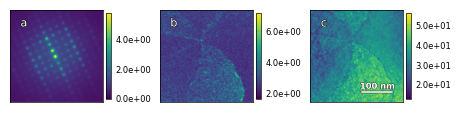

In [8]:
bright_field_ = (150, 162, 152, 165)
dark_field_ = (106, 123, 110, 125)
filename = "STEM_raw_and_virtual_vortex_domains"
viz.scalebar_ = {"width": 291, "scale length": 100, "units": "nm"}
viz.STEM_raw_and_virtual(
    vortex,
    bright_field_=bright_field_,
    dark_field_=dark_field_,
    scalebar_=True,
    filename=filename,
    shape_=vortex.data.shape,
)

In [9]:
encoder_step_size = [256, 256]
pooling_list = [4, 4, 2]
decoder_step_size = [8, 8]
upsampling_list = [2, 4, 4]
embedding_size = 32
conv_size = 128
checkpoints_folder = 'downloaded_weights'


# set device to load model
device = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"

model = VariationalAutoencoder(
    encoder_step_size=encoder_step_size,
    pooling_list=pooling_list,
    decoder_step_size=decoder_step_size,
    upsampling_list=upsampling_list,
    embedding_size=embedding_size,
    conv_size=conv_size,
    device=device,
    learning_rate=3e-5,
)


In [31]:
# set retrain parameter
# manually change beta if you incremented it
train = False
if train:
    model.Train(
        vortex.log_data,
        epochs=1,
        with_scheduler=False,
        folder_path=f'{save_path}/{checkpoints_folder}',
        batch_size=16,
        beta=0,
        beta_schedule=[5e-4,1]
    )

else:
    model.load_weights(
        f'{save_path}/{checkpoints_folder}/Weight_epoch:0027_l1coef:0.0000_lr:0.00003_trainloss:0.7317.pkl'
        )

100%|██████████| 4096/4096 [36:27<00:00,  1.87it/s]


Epoch: 000/001 | Train Loss: 0.7382
.............................


In [10]:
embedding = model.get_embedding(vortex.log_data,batch_size=16)


  0%|          | 0/4096 [00:00<?, ?it/s]

  0%|          | 1/4096 [00:00<18:42,  3.65it/s]

  0%|          | 3/4096 [00:00<09:17,  7.34it/s]

  0%|          | 5/4096 [00:00<07:28,  9.12it/s]

  0%|          | 7/4096 [00:00<06:46, 10.06it/s]

  0%|          | 9/4096 [00:00<06:22, 10.68it/s]

  0%|          | 11/4096 [00:01<06:08, 11.07it/s]

  0%|          | 13/4096 [00:01<06:00, 11.32it/s]

  0%|          | 15/4096 [00:01<05:55, 11.50it/s]

  0%|          | 17/4096 [00:01<05:51, 11.62it/s]

  0%|          | 19/4096 [00:01<05:50, 11.64it/s]

  1%|          | 21/4096 [00:01<05:47, 11.72it/s]

  1%|          | 23/4096 [00:02<05:46, 11.77it/s]

  1%|          | 25/4096 [00:02<05:44, 11.80it/s]

  1%|          | 27/4096 [00:02<05:43, 11.83it/s]

  1%|          | 29/4096 [00:02<05:43, 11.85it/s]

  1%|          | 31/4096 [00:02<05:42, 11.86it/s]

  1%|          | 33/4096 [00:02<05:42, 11.87it/s]

  1%|          | 35/4096 [00:03<05:42, 11.87it/s]

  1%|          | 37/4096 [00:03<05:41, 11.88it/s]

  1%|          | 39/4096 [00:03<05:41, 11.89it/s]

  1%|          | 41/4096 [00:03<05:40, 11.89it/s]

  1%|          | 43/4096 [00:03<05:40, 11.90it/s]

  1%|          | 45/4096 [00:03<05:40, 11.90it/s]

  1%|          | 47/4096 [00:04<05:40, 11.89it/s]

  1%|          | 49/4096 [00:04<05:40, 11.89it/s]

  1%|          | 51/4096 [00:04<05:40, 11.89it/s]

  1%|▏         | 53/4096 [00:04<05:39, 11.89it/s]

  1%|▏         | 55/4096 [00:04<05:39, 11.90it/s]

  1%|▏         | 57/4096 [00:04<05:39, 11.89it/s]

  1%|▏         | 59/4096 [00:05<05:39, 11.88it/s]

  1%|▏         | 61/4096 [00:05<05:39, 11.89it/s]

  2%|▏         | 63/4096 [00:05<05:39, 11.89it/s]

  2%|▏         | 65/4096 [00:05<05:38, 11.90it/s]

  2%|▏         | 67/4096 [00:05<05:38, 11.90it/s]

  2%|▏         | 69/4096 [00:06<05:38, 11.90it/s]

  2%|▏         | 71/4096 [00:06<05:38, 11.90it/s]

  2%|▏         | 73/4096 [00:06<05:37, 11.90it/s]

  2%|▏         | 75/4096 [00:06<05:38, 11.89it/s]

  2%|▏         | 77/4096 [00:06<05:38, 11.87it/s]

  2%|▏         | 79/4096 [00:06<05:38, 11.86it/s]

  2%|▏         | 81/4096 [00:07<05:38, 11.86it/s]

  2%|▏         | 83/4096 [00:07<05:38, 11.85it/s]

  2%|▏         | 85/4096 [00:07<05:38, 11.86it/s]

  2%|▏         | 87/4096 [00:07<05:38, 11.86it/s]

  2%|▏         | 89/4096 [00:07<05:37, 11.86it/s]

  2%|▏         | 91/4096 [00:07<05:38, 11.85it/s]

  2%|▏         | 93/4096 [00:08<05:37, 11.86it/s]

  2%|▏         | 95/4096 [00:08<05:36, 11.88it/s]

  2%|▏         | 97/4096 [00:08<05:36, 11.88it/s]

  2%|▏         | 99/4096 [00:08<05:36, 11.88it/s]

  2%|▏         | 101/4096 [00:08<05:36, 11.88it/s]

  3%|▎         | 103/4096 [00:08<05:35, 11.89it/s]

  3%|▎         | 105/4096 [00:09<05:35, 11.89it/s]

  3%|▎         | 107/4096 [00:09<05:35, 11.89it/s]

  3%|▎         | 109/4096 [00:09<05:35, 11.90it/s]

  3%|▎         | 111/4096 [00:09<05:34, 11.90it/s]

  3%|▎         | 113/4096 [00:09<05:34, 11.90it/s]

  3%|▎         | 115/4096 [00:09<05:34, 11.90it/s]

  3%|▎         | 117/4096 [00:10<05:34, 11.90it/s]

  3%|▎         | 119/4096 [00:10<05:34, 11.89it/s]

  3%|▎         | 121/4096 [00:10<05:34, 11.89it/s]

  3%|▎         | 123/4096 [00:10<05:34, 11.89it/s]

  3%|▎         | 125/4096 [00:10<05:33, 11.89it/s]

  3%|▎         | 127/4096 [00:10<05:33, 11.90it/s]

  3%|▎         | 129/4096 [00:11<05:33, 11.91it/s]

  3%|▎         | 131/4096 [00:11<05:33, 11.90it/s]

  3%|▎         | 133/4096 [00:11<05:33, 11.89it/s]

  3%|▎         | 135/4096 [00:11<05:33, 11.89it/s]

  3%|▎         | 137/4096 [00:11<05:33, 11.87it/s]

  3%|▎         | 139/4096 [00:11<05:32, 11.88it/s]

  3%|▎         | 141/4096 [00:12<05:33, 11.87it/s]

  3%|▎         | 143/4096 [00:12<05:32, 11.88it/s]

  4%|▎         | 145/4096 [00:12<05:32, 11.89it/s]

  4%|▎         | 147/4096 [00:12<05:31, 11.90it/s]

  4%|▎         | 149/4096 [00:12<05:31, 11.91it/s]

  4%|▎         | 151/4096 [00:12<05:30, 11.92it/s]

  4%|▎         | 153/4096 [00:13<05:30, 11.93it/s]

  4%|▍         | 155/4096 [00:13<05:30, 11.93it/s]

  4%|▍         | 157/4096 [00:13<05:30, 11.93it/s]

  4%|▍         | 159/4096 [00:13<05:29, 11.93it/s]

  4%|▍         | 161/4096 [00:13<05:29, 11.93it/s]

  4%|▍         | 163/4096 [00:13<05:29, 11.94it/s]

  4%|▍         | 165/4096 [00:14<05:29, 11.93it/s]

  4%|▍         | 167/4096 [00:14<05:29, 11.93it/s]

  4%|▍         | 169/4096 [00:14<05:29, 11.92it/s]

  4%|▍         | 171/4096 [00:14<05:29, 11.92it/s]

  4%|▍         | 173/4096 [00:14<05:29, 11.92it/s]

  4%|▍         | 175/4096 [00:14<05:29, 11.91it/s]

  4%|▍         | 177/4096 [00:15<05:28, 11.92it/s]

  4%|▍         | 179/4096 [00:15<05:28, 11.91it/s]

  4%|▍         | 181/4096 [00:15<05:28, 11.92it/s]

  4%|▍         | 183/4096 [00:15<05:27, 11.93it/s]

  5%|▍         | 185/4096 [00:15<05:27, 11.93it/s]

  5%|▍         | 187/4096 [00:15<05:27, 11.93it/s]

  5%|▍         | 189/4096 [00:16<05:27, 11.93it/s]

  5%|▍         | 191/4096 [00:16<05:27, 11.92it/s]

  5%|▍         | 193/4096 [00:16<05:27, 11.93it/s]

  5%|▍         | 195/4096 [00:16<05:27, 11.93it/s]

  5%|▍         | 197/4096 [00:16<05:27, 11.92it/s]

  5%|▍         | 199/4096 [00:16<05:27, 11.92it/s]

  5%|▍         | 201/4096 [00:17<05:27, 11.91it/s]

  5%|▍         | 203/4096 [00:17<05:26, 11.91it/s]

  5%|▌         | 205/4096 [00:17<05:26, 11.91it/s]

  5%|▌         | 207/4096 [00:17<05:26, 11.90it/s]

  5%|▌         | 209/4096 [00:17<05:26, 11.90it/s]

  5%|▌         | 211/4096 [00:17<05:26, 11.90it/s]

  5%|▌         | 213/4096 [00:18<05:26, 11.91it/s]

  5%|▌         | 215/4096 [00:18<05:25, 11.91it/s]

  5%|▌         | 217/4096 [00:18<05:25, 11.91it/s]

  5%|▌         | 219/4096 [00:18<05:25, 11.91it/s]

  5%|▌         | 221/4096 [00:18<05:26, 11.87it/s]

  5%|▌         | 223/4096 [00:18<05:25, 11.89it/s]

  5%|▌         | 225/4096 [00:19<05:25, 11.90it/s]

  6%|▌         | 227/4096 [00:19<05:25, 11.90it/s]

  6%|▌         | 229/4096 [00:19<05:24, 11.90it/s]

  6%|▌         | 231/4096 [00:19<05:24, 11.91it/s]

  6%|▌         | 233/4096 [00:19<05:24, 11.89it/s]

  6%|▌         | 235/4096 [00:19<05:24, 11.89it/s]

  6%|▌         | 237/4096 [00:20<05:24, 11.90it/s]

  6%|▌         | 239/4096 [00:20<05:24, 11.90it/s]

  6%|▌         | 241/4096 [00:20<05:23, 11.91it/s]

  6%|▌         | 243/4096 [00:20<05:23, 11.91it/s]

  6%|▌         | 245/4096 [00:20<05:23, 11.90it/s]

  6%|▌         | 247/4096 [00:20<05:23, 11.91it/s]

  6%|▌         | 249/4096 [00:21<05:23, 11.91it/s]

  6%|▌         | 251/4096 [00:21<05:23, 11.89it/s]

  6%|▌         | 253/4096 [00:21<05:23, 11.88it/s]

  6%|▌         | 255/4096 [00:21<05:23, 11.88it/s]

  6%|▋         | 257/4096 [00:21<05:23, 11.88it/s]

  6%|▋         | 259/4096 [00:21<05:23, 11.88it/s]

  6%|▋         | 261/4096 [00:22<05:23, 11.86it/s]

  6%|▋         | 263/4096 [00:22<05:23, 11.86it/s]

  6%|▋         | 265/4096 [00:22<05:23, 11.84it/s]

  7%|▋         | 267/4096 [00:22<05:22, 11.86it/s]

  7%|▋         | 269/4096 [00:22<05:22, 11.87it/s]

  7%|▋         | 271/4096 [00:22<05:22, 11.87it/s]

  7%|▋         | 273/4096 [00:23<05:21, 11.88it/s]

  7%|▋         | 275/4096 [00:23<05:21, 11.88it/s]

  7%|▋         | 277/4096 [00:23<05:21, 11.89it/s]

  7%|▋         | 279/4096 [00:23<05:21, 11.89it/s]

  7%|▋         | 281/4096 [00:23<05:20, 11.89it/s]

  7%|▋         | 283/4096 [00:23<05:20, 11.88it/s]

  7%|▋         | 285/4096 [00:24<05:20, 11.89it/s]

  7%|▋         | 287/4096 [00:24<05:20, 11.89it/s]

  7%|▋         | 289/4096 [00:24<05:20, 11.89it/s]

  7%|▋         | 291/4096 [00:24<05:20, 11.88it/s]

  7%|▋         | 293/4096 [00:24<05:20, 11.87it/s]

  7%|▋         | 295/4096 [00:25<05:20, 11.87it/s]

  7%|▋         | 297/4096 [00:25<05:20, 11.87it/s]

  7%|▋         | 299/4096 [00:25<05:19, 11.87it/s]

  7%|▋         | 301/4096 [00:25<05:19, 11.88it/s]

  7%|▋         | 303/4096 [00:25<05:19, 11.88it/s]

  7%|▋         | 305/4096 [00:25<05:19, 11.88it/s]

  7%|▋         | 307/4096 [00:26<05:18, 11.89it/s]

  8%|▊         | 309/4096 [00:26<05:18, 11.89it/s]

  8%|▊         | 311/4096 [00:26<05:18, 11.89it/s]

  8%|▊         | 313/4096 [00:26<05:18, 11.89it/s]

  8%|▊         | 315/4096 [00:26<05:17, 11.90it/s]

  8%|▊         | 317/4096 [00:26<05:17, 11.90it/s]

  8%|▊         | 319/4096 [00:27<05:17, 11.90it/s]

  8%|▊         | 321/4096 [00:27<05:17, 11.91it/s]

  8%|▊         | 323/4096 [00:27<05:16, 11.91it/s]

  8%|▊         | 325/4096 [00:27<05:16, 11.91it/s]

  8%|▊         | 327/4096 [00:27<05:16, 11.92it/s]

  8%|▊         | 329/4096 [00:27<05:16, 11.92it/s]

  8%|▊         | 331/4096 [00:28<05:16, 11.91it/s]

  8%|▊         | 333/4096 [00:28<05:15, 11.91it/s]

  8%|▊         | 335/4096 [00:28<05:15, 11.91it/s]

  8%|▊         | 337/4096 [00:28<05:15, 11.91it/s]

  8%|▊         | 339/4096 [00:28<05:15, 11.91it/s]

  8%|▊         | 341/4096 [00:28<05:15, 11.91it/s]

  8%|▊         | 343/4096 [00:29<05:15, 11.91it/s]

  8%|▊         | 345/4096 [00:29<05:15, 11.91it/s]

  8%|▊         | 347/4096 [00:29<05:14, 11.92it/s]

  9%|▊         | 349/4096 [00:29<05:14, 11.92it/s]

  9%|▊         | 351/4096 [00:29<05:14, 11.91it/s]

  9%|▊         | 353/4096 [00:29<05:14, 11.92it/s]

  9%|▊         | 355/4096 [00:30<05:13, 11.93it/s]

  9%|▊         | 357/4096 [00:30<05:13, 11.92it/s]

  9%|▉         | 359/4096 [00:30<05:13, 11.92it/s]

  9%|▉         | 361/4096 [00:30<05:13, 11.93it/s]

  9%|▉         | 363/4096 [00:30<05:12, 11.93it/s]

  9%|▉         | 365/4096 [00:30<05:12, 11.92it/s]

  9%|▉         | 367/4096 [00:31<05:12, 11.92it/s]

  9%|▉         | 369/4096 [00:31<05:12, 11.92it/s]

  9%|▉         | 371/4096 [00:31<05:12, 11.93it/s]

  9%|▉         | 373/4096 [00:31<05:12, 11.92it/s]

  9%|▉         | 375/4096 [00:31<05:11, 11.93it/s]

  9%|▉         | 377/4096 [00:31<05:11, 11.92it/s]

  9%|▉         | 379/4096 [00:32<05:11, 11.92it/s]

  9%|▉         | 381/4096 [00:32<05:11, 11.93it/s]

  9%|▉         | 383/4096 [00:32<05:11, 11.93it/s]

  9%|▉         | 385/4096 [00:32<05:11, 11.93it/s]

  9%|▉         | 387/4096 [00:32<05:10, 11.93it/s]

  9%|▉         | 389/4096 [00:32<05:10, 11.93it/s]

 10%|▉         | 391/4096 [00:33<05:10, 11.93it/s]

 10%|▉         | 393/4096 [00:33<05:10, 11.93it/s]

 10%|▉         | 395/4096 [00:33<05:10, 11.91it/s]

 10%|▉         | 397/4096 [00:33<05:10, 11.91it/s]

 10%|▉         | 399/4096 [00:33<05:10, 11.90it/s]

 10%|▉         | 401/4096 [00:33<05:10, 11.90it/s]

 10%|▉         | 403/4096 [00:34<05:10, 11.91it/s]

 10%|▉         | 405/4096 [00:34<05:09, 11.91it/s]

 10%|▉         | 407/4096 [00:34<05:09, 11.90it/s]

 10%|▉         | 409/4096 [00:34<05:09, 11.90it/s]

 10%|█         | 411/4096 [00:34<05:09, 11.90it/s]

 10%|█         | 413/4096 [00:34<05:09, 11.90it/s]

 10%|█         | 415/4096 [00:35<05:09, 11.90it/s]

 10%|█         | 417/4096 [00:35<05:09, 11.90it/s]

 10%|█         | 419/4096 [00:35<05:09, 11.86it/s]

 10%|█         | 421/4096 [00:35<05:09, 11.87it/s]

 10%|█         | 423/4096 [00:35<05:09, 11.88it/s]

 10%|█         | 425/4096 [00:35<05:08, 11.89it/s]

 10%|█         | 427/4096 [00:36<05:08, 11.89it/s]

 10%|█         | 429/4096 [00:36<05:08, 11.90it/s]

 11%|█         | 431/4096 [00:36<05:07, 11.90it/s]

 11%|█         | 433/4096 [00:36<05:07, 11.90it/s]

 11%|█         | 435/4096 [00:36<05:07, 11.90it/s]

 11%|█         | 437/4096 [00:36<05:07, 11.89it/s]

 11%|█         | 439/4096 [00:37<05:07, 11.89it/s]

 11%|█         | 441/4096 [00:37<05:07, 11.89it/s]

 11%|█         | 443/4096 [00:37<05:07, 11.88it/s]

 11%|█         | 445/4096 [00:37<05:07, 11.88it/s]

 11%|█         | 447/4096 [00:37<05:06, 11.89it/s]

 11%|█         | 449/4096 [00:37<05:06, 11.88it/s]

 11%|█         | 451/4096 [00:38<05:06, 11.88it/s]

 11%|█         | 453/4096 [00:38<05:06, 11.88it/s]

 11%|█         | 455/4096 [00:38<05:06, 11.89it/s]

 11%|█         | 457/4096 [00:38<05:06, 11.89it/s]

 11%|█         | 459/4096 [00:38<05:06, 11.88it/s]

 11%|█▏        | 461/4096 [00:38<05:05, 11.88it/s]

 11%|█▏        | 463/4096 [00:39<05:05, 11.88it/s]

 11%|█▏        | 465/4096 [00:39<05:05, 11.87it/s]

 11%|█▏        | 467/4096 [00:39<05:05, 11.87it/s]

 11%|█▏        | 469/4096 [00:39<05:05, 11.88it/s]

 11%|█▏        | 471/4096 [00:39<05:04, 11.89it/s]

 12%|█▏        | 473/4096 [00:39<05:04, 11.89it/s]

 12%|█▏        | 475/4096 [00:40<05:04, 11.89it/s]

 12%|█▏        | 477/4096 [00:40<05:04, 11.89it/s]

 12%|█▏        | 479/4096 [00:40<05:04, 11.88it/s]

 12%|█▏        | 481/4096 [00:40<05:04, 11.87it/s]

 12%|█▏        | 483/4096 [00:40<05:04, 11.88it/s]

 12%|█▏        | 485/4096 [00:40<05:03, 11.89it/s]

 12%|█▏        | 487/4096 [00:41<05:03, 11.90it/s]

 12%|█▏        | 489/4096 [00:41<05:03, 11.90it/s]

 12%|█▏        | 491/4096 [00:41<05:03, 11.89it/s]

 12%|█▏        | 493/4096 [00:41<05:03, 11.86it/s]

 12%|█▏        | 495/4096 [00:41<05:03, 11.88it/s]

 12%|█▏        | 497/4096 [00:41<05:02, 11.89it/s]

 12%|█▏        | 499/4096 [00:42<05:02, 11.89it/s]

 12%|█▏        | 501/4096 [00:42<05:02, 11.90it/s]

 12%|█▏        | 503/4096 [00:42<05:01, 11.90it/s]

 12%|█▏        | 505/4096 [00:42<05:02, 11.88it/s]

 12%|█▏        | 507/4096 [00:42<05:01, 11.90it/s]

 12%|█▏        | 509/4096 [00:42<05:01, 11.91it/s]

 12%|█▏        | 511/4096 [00:43<05:01, 11.91it/s]

 13%|█▎        | 513/4096 [00:43<05:00, 11.91it/s]

 13%|█▎        | 515/4096 [00:43<05:00, 11.92it/s]

 13%|█▎        | 517/4096 [00:43<05:00, 11.92it/s]

 13%|█▎        | 519/4096 [00:43<05:00, 11.92it/s]

 13%|█▎        | 521/4096 [00:43<05:00, 11.91it/s]

 13%|█▎        | 523/4096 [00:44<05:00, 11.90it/s]

 13%|█▎        | 525/4096 [00:44<05:00, 11.90it/s]

 13%|█▎        | 527/4096 [00:44<04:59, 11.91it/s]

 13%|█▎        | 529/4096 [00:44<04:59, 11.91it/s]

 13%|█▎        | 531/4096 [00:44<04:59, 11.91it/s]

 13%|█▎        | 533/4096 [00:45<04:59, 11.91it/s]

 13%|█▎        | 535/4096 [00:45<04:58, 11.91it/s]

 13%|█▎        | 537/4096 [00:45<04:59, 11.88it/s]

 13%|█▎        | 539/4096 [00:45<05:00, 11.84it/s]

 13%|█▎        | 541/4096 [00:45<04:59, 11.85it/s]

 13%|█▎        | 543/4096 [00:45<04:59, 11.87it/s]

 13%|█▎        | 545/4096 [00:46<04:59, 11.87it/s]

 13%|█▎        | 547/4096 [00:46<04:58, 11.87it/s]

 13%|█▎        | 549/4096 [00:46<04:58, 11.87it/s]

 13%|█▎        | 551/4096 [00:46<04:58, 11.88it/s]

 14%|█▎        | 553/4096 [00:46<04:58, 11.88it/s]

 14%|█▎        | 555/4096 [00:46<04:57, 11.88it/s]

 14%|█▎        | 557/4096 [00:47<04:57, 11.89it/s]

 14%|█▎        | 559/4096 [00:47<04:57, 11.89it/s]

 14%|█▎        | 561/4096 [00:47<04:57, 11.89it/s]

 14%|█▎        | 563/4096 [00:47<04:57, 11.89it/s]

 14%|█▍        | 565/4096 [00:47<04:57, 11.89it/s]

 14%|█▍        | 567/4096 [00:47<04:56, 11.90it/s]

 14%|█▍        | 569/4096 [00:48<04:57, 11.88it/s]

 14%|█▍        | 571/4096 [00:48<04:57, 11.87it/s]

 14%|█▍        | 573/4096 [00:48<04:57, 11.86it/s]

 14%|█▍        | 575/4096 [00:48<04:57, 11.85it/s]

 14%|█▍        | 577/4096 [00:48<04:57, 11.85it/s]

 14%|█▍        | 579/4096 [00:48<04:56, 11.87it/s]

 14%|█▍        | 581/4096 [00:49<04:56, 11.87it/s]

 14%|█▍        | 583/4096 [00:49<04:55, 11.87it/s]

 14%|█▍        | 585/4096 [00:49<04:55, 11.88it/s]

 14%|█▍        | 587/4096 [00:49<04:55, 11.88it/s]

 14%|█▍        | 589/4096 [00:49<04:55, 11.88it/s]

 14%|█▍        | 591/4096 [00:49<04:55, 11.87it/s]

 14%|█▍        | 593/4096 [00:50<04:55, 11.84it/s]

 15%|█▍        | 595/4096 [00:50<04:55, 11.85it/s]

 15%|█▍        | 597/4096 [00:50<04:55, 11.83it/s]

 15%|█▍        | 599/4096 [00:50<04:55, 11.83it/s]

 15%|█▍        | 601/4096 [00:50<04:55, 11.83it/s]

 15%|█▍        | 603/4096 [00:50<04:55, 11.82it/s]

 15%|█▍        | 605/4096 [00:51<04:55, 11.81it/s]

 15%|█▍        | 607/4096 [00:51<04:54, 11.83it/s]

 15%|█▍        | 609/4096 [00:51<04:54, 11.84it/s]

 15%|█▍        | 611/4096 [00:51<04:54, 11.85it/s]

 15%|█▍        | 613/4096 [00:51<04:54, 11.82it/s]

 15%|█▌        | 615/4096 [00:51<04:53, 11.84it/s]

 15%|█▌        | 617/4096 [00:52<04:53, 11.85it/s]

 15%|█▌        | 619/4096 [00:52<04:53, 11.85it/s]

 15%|█▌        | 621/4096 [00:52<04:53, 11.85it/s]

 15%|█▌        | 623/4096 [00:52<04:53, 11.84it/s]

 15%|█▌        | 625/4096 [00:52<04:53, 11.84it/s]

 15%|█▌        | 627/4096 [00:52<04:52, 11.86it/s]

 15%|█▌        | 629/4096 [00:53<04:52, 11.86it/s]

 15%|█▌        | 631/4096 [00:53<04:51, 11.87it/s]

 15%|█▌        | 633/4096 [00:53<04:51, 11.87it/s]

 16%|█▌        | 635/4096 [00:53<04:51, 11.88it/s]

 16%|█▌        | 637/4096 [00:53<04:51, 11.86it/s]

 16%|█▌        | 639/4096 [00:53<04:50, 11.88it/s]

 16%|█▌        | 641/4096 [00:54<04:50, 11.90it/s]

 16%|█▌        | 643/4096 [00:54<04:50, 11.90it/s]

 16%|█▌        | 645/4096 [00:54<04:49, 11.91it/s]

 16%|█▌        | 647/4096 [00:54<04:49, 11.91it/s]

 16%|█▌        | 649/4096 [00:54<04:50, 11.87it/s]

 16%|█▌        | 651/4096 [00:54<04:50, 11.87it/s]

 16%|█▌        | 653/4096 [00:55<04:49, 11.88it/s]

 16%|█▌        | 655/4096 [00:55<04:49, 11.88it/s]

 16%|█▌        | 657/4096 [00:55<04:49, 11.89it/s]

 16%|█▌        | 659/4096 [00:55<04:49, 11.89it/s]

 16%|█▌        | 661/4096 [00:55<04:48, 11.90it/s]

 16%|█▌        | 663/4096 [00:55<04:48, 11.89it/s]

 16%|█▌        | 665/4096 [00:56<04:48, 11.90it/s]

 16%|█▋        | 667/4096 [00:56<04:48, 11.90it/s]

 16%|█▋        | 669/4096 [00:56<04:48, 11.90it/s]

 16%|█▋        | 671/4096 [00:56<04:48, 11.89it/s]

 16%|█▋        | 673/4096 [00:56<04:47, 11.89it/s]

 16%|█▋        | 675/4096 [00:56<04:47, 11.89it/s]

 17%|█▋        | 677/4096 [00:57<04:47, 11.89it/s]

 17%|█▋        | 679/4096 [00:57<04:47, 11.89it/s]

 17%|█▋        | 681/4096 [00:57<04:47, 11.87it/s]

 17%|█▋        | 683/4096 [00:57<04:47, 11.88it/s]

 17%|█▋        | 685/4096 [00:57<04:47, 11.88it/s]

 17%|█▋        | 687/4096 [00:57<04:46, 11.89it/s]

 17%|█▋        | 689/4096 [00:58<04:46, 11.87it/s]

 17%|█▋        | 691/4096 [00:58<04:46, 11.89it/s]

 17%|█▋        | 693/4096 [00:58<04:46, 11.89it/s]

 17%|█▋        | 695/4096 [00:58<04:45, 11.90it/s]

 17%|█▋        | 697/4096 [00:58<04:45, 11.89it/s]

 17%|█▋        | 699/4096 [00:58<04:45, 11.89it/s]

 17%|█▋        | 701/4096 [00:59<04:45, 11.89it/s]

 17%|█▋        | 703/4096 [00:59<04:45, 11.88it/s]

 17%|█▋        | 705/4096 [00:59<04:45, 11.89it/s]

 17%|█▋        | 707/4096 [00:59<04:44, 11.90it/s]

 17%|█▋        | 709/4096 [00:59<04:44, 11.89it/s]

 17%|█▋        | 711/4096 [00:59<04:44, 11.89it/s]

 17%|█▋        | 713/4096 [01:00<04:44, 11.90it/s]

 17%|█▋        | 715/4096 [01:00<04:44, 11.90it/s]

 18%|█▊        | 717/4096 [01:00<04:44, 11.89it/s]

 18%|█▊        | 719/4096 [01:00<04:43, 11.89it/s]

 18%|█▊        | 721/4096 [01:00<04:43, 11.90it/s]

 18%|█▊        | 723/4096 [01:01<04:43, 11.89it/s]

 18%|█▊        | 725/4096 [01:01<04:43, 11.90it/s]

 18%|█▊        | 727/4096 [01:01<04:43, 11.90it/s]

 18%|█▊        | 729/4096 [01:01<04:42, 11.90it/s]

 18%|█▊        | 731/4096 [01:01<04:42, 11.90it/s]

 18%|█▊        | 733/4096 [01:01<04:42, 11.90it/s]

 18%|█▊        | 735/4096 [01:02<04:42, 11.90it/s]

 18%|█▊        | 737/4096 [01:02<04:42, 11.90it/s]

 18%|█▊        | 739/4096 [01:02<04:41, 11.91it/s]

 18%|█▊        | 741/4096 [01:02<04:41, 11.90it/s]

 18%|█▊        | 743/4096 [01:02<04:41, 11.90it/s]

 18%|█▊        | 745/4096 [01:02<04:41, 11.90it/s]

 18%|█▊        | 747/4096 [01:03<04:41, 11.90it/s]

 18%|█▊        | 749/4096 [01:03<04:41, 11.89it/s]

 18%|█▊        | 751/4096 [01:03<04:41, 11.90it/s]

 18%|█▊        | 753/4096 [01:03<04:40, 11.90it/s]

 18%|█▊        | 755/4096 [01:03<04:40, 11.90it/s]

 18%|█▊        | 757/4096 [01:03<04:40, 11.90it/s]

 19%|█▊        | 759/4096 [01:04<04:40, 11.90it/s]

 19%|█▊        | 761/4096 [01:04<04:40, 11.89it/s]

 19%|█▊        | 763/4096 [01:04<04:40, 11.89it/s]

 19%|█▊        | 765/4096 [01:04<04:39, 11.90it/s]

 19%|█▊        | 767/4096 [01:04<04:39, 11.90it/s]

 19%|█▉        | 769/4096 [01:04<04:39, 11.90it/s]

 19%|█▉        | 771/4096 [01:05<04:39, 11.90it/s]

 19%|█▉        | 773/4096 [01:05<04:39, 11.90it/s]

 19%|█▉        | 775/4096 [01:05<04:39, 11.90it/s]

 19%|█▉        | 777/4096 [01:05<04:38, 11.90it/s]

 19%|█▉        | 779/4096 [01:05<04:38, 11.90it/s]

 19%|█▉        | 781/4096 [01:05<04:38, 11.90it/s]

 19%|█▉        | 783/4096 [01:06<04:38, 11.89it/s]

 19%|█▉        | 785/4096 [01:06<04:38, 11.88it/s]

 19%|█▉        | 787/4096 [01:06<04:38, 11.87it/s]

 19%|█▉        | 789/4096 [01:06<04:38, 11.86it/s]

 19%|█▉        | 791/4096 [01:06<04:38, 11.86it/s]

 19%|█▉        | 793/4096 [01:06<04:38, 11.86it/s]

 19%|█▉        | 795/4096 [01:07<04:38, 11.86it/s]

 19%|█▉        | 797/4096 [01:07<04:37, 11.87it/s]

 20%|█▉        | 799/4096 [01:07<04:37, 11.87it/s]

 20%|█▉        | 801/4096 [01:07<04:37, 11.88it/s]

 20%|█▉        | 803/4096 [01:07<04:37, 11.88it/s]

 20%|█▉        | 805/4096 [01:07<04:37, 11.88it/s]

 20%|█▉        | 807/4096 [01:08<04:36, 11.88it/s]

 20%|█▉        | 809/4096 [01:08<04:36, 11.88it/s]

 20%|█▉        | 811/4096 [01:08<04:36, 11.88it/s]

 20%|█▉        | 813/4096 [01:08<04:36, 11.88it/s]

 20%|█▉        | 815/4096 [01:08<04:36, 11.88it/s]

 20%|█▉        | 817/4096 [01:08<04:35, 11.88it/s]

 20%|█▉        | 819/4096 [01:09<04:35, 11.88it/s]

 20%|██        | 821/4096 [01:09<04:35, 11.89it/s]

 20%|██        | 823/4096 [01:09<04:35, 11.89it/s]

 20%|██        | 825/4096 [01:09<04:35, 11.89it/s]

 20%|██        | 827/4096 [01:09<04:35, 11.88it/s]

 20%|██        | 829/4096 [01:09<04:35, 11.87it/s]

 20%|██        | 831/4096 [01:10<04:35, 11.87it/s]

 20%|██        | 833/4096 [01:10<04:34, 11.88it/s]

 20%|██        | 835/4096 [01:10<04:34, 11.89it/s]

 20%|██        | 837/4096 [01:10<04:34, 11.89it/s]

 20%|██        | 839/4096 [01:10<04:34, 11.89it/s]

 21%|██        | 841/4096 [01:10<04:33, 11.89it/s]

 21%|██        | 843/4096 [01:11<04:33, 11.89it/s]

 21%|██        | 845/4096 [01:11<04:33, 11.89it/s]

 21%|██        | 847/4096 [01:11<04:33, 11.88it/s]

 21%|██        | 849/4096 [01:11<04:33, 11.88it/s]

 21%|██        | 851/4096 [01:11<04:33, 11.88it/s]

 21%|██        | 853/4096 [01:11<04:32, 11.88it/s]

 21%|██        | 855/4096 [01:12<04:32, 11.89it/s]

 21%|██        | 857/4096 [01:12<04:32, 11.89it/s]

 21%|██        | 859/4096 [01:12<04:32, 11.89it/s]

 21%|██        | 861/4096 [01:12<04:32, 11.89it/s]

 21%|██        | 863/4096 [01:12<04:31, 11.89it/s]

 21%|██        | 865/4096 [01:12<04:32, 11.87it/s]

 21%|██        | 867/4096 [01:13<04:31, 11.88it/s]

 21%|██        | 869/4096 [01:13<04:31, 11.87it/s]

 21%|██▏       | 871/4096 [01:13<04:31, 11.87it/s]

 21%|██▏       | 873/4096 [01:13<04:31, 11.88it/s]

 21%|██▏       | 875/4096 [01:13<04:31, 11.88it/s]

 21%|██▏       | 877/4096 [01:13<04:30, 11.88it/s]

 21%|██▏       | 879/4096 [01:14<04:30, 11.89it/s]

 22%|██▏       | 881/4096 [01:14<04:30, 11.89it/s]

 22%|██▏       | 883/4096 [01:14<04:30, 11.89it/s]

 22%|██▏       | 885/4096 [01:14<04:30, 11.89it/s]

 22%|██▏       | 887/4096 [01:14<04:30, 11.88it/s]

 22%|██▏       | 889/4096 [01:14<04:30, 11.88it/s]

 22%|██▏       | 891/4096 [01:15<04:29, 11.88it/s]

 22%|██▏       | 893/4096 [01:15<04:29, 11.89it/s]

 22%|██▏       | 895/4096 [01:15<04:29, 11.89it/s]

 22%|██▏       | 897/4096 [01:15<04:29, 11.88it/s]

 22%|██▏       | 899/4096 [01:15<04:29, 11.88it/s]

 22%|██▏       | 901/4096 [01:15<04:28, 11.89it/s]

 22%|██▏       | 903/4096 [01:16<04:28, 11.87it/s]

 22%|██▏       | 905/4096 [01:16<04:28, 11.87it/s]

 22%|██▏       | 907/4096 [01:16<04:28, 11.86it/s]

 22%|██▏       | 909/4096 [01:16<04:28, 11.87it/s]

 22%|██▏       | 911/4096 [01:16<04:28, 11.88it/s]

 22%|██▏       | 913/4096 [01:16<04:27, 11.89it/s]

 22%|██▏       | 915/4096 [01:17<04:28, 11.86it/s]

 22%|██▏       | 917/4096 [01:17<04:27, 11.86it/s]

 22%|██▏       | 919/4096 [01:17<04:27, 11.88it/s]

 22%|██▏       | 921/4096 [01:17<04:27, 11.89it/s]

 23%|██▎       | 923/4096 [01:17<04:26, 11.89it/s]

 23%|██▎       | 925/4096 [01:17<04:26, 11.89it/s]

 23%|██▎       | 927/4096 [01:18<04:26, 11.89it/s]

 23%|██▎       | 929/4096 [01:18<04:26, 11.90it/s]

 23%|██▎       | 931/4096 [01:18<04:25, 11.90it/s]

 23%|██▎       | 933/4096 [01:18<04:25, 11.90it/s]

 23%|██▎       | 935/4096 [01:18<04:25, 11.90it/s]

 23%|██▎       | 937/4096 [01:19<04:25, 11.90it/s]

 23%|██▎       | 939/4096 [01:19<04:25, 11.90it/s]

 23%|██▎       | 941/4096 [01:19<04:25, 11.90it/s]

 23%|██▎       | 943/4096 [01:19<04:24, 11.91it/s]

 23%|██▎       | 945/4096 [01:19<04:24, 11.91it/s]

 23%|██▎       | 947/4096 [01:19<04:24, 11.91it/s]

 23%|██▎       | 949/4096 [01:20<04:24, 11.90it/s]

 23%|██▎       | 951/4096 [01:20<04:24, 11.90it/s]

 23%|██▎       | 953/4096 [01:20<04:25, 11.85it/s]

 23%|██▎       | 955/4096 [01:20<04:24, 11.86it/s]

 23%|██▎       | 957/4096 [01:20<04:24, 11.85it/s]

 23%|██▎       | 959/4096 [01:20<04:24, 11.86it/s]

 23%|██▎       | 961/4096 [01:21<04:24, 11.87it/s]

 24%|██▎       | 963/4096 [01:21<04:23, 11.87it/s]

 24%|██▎       | 965/4096 [01:21<04:23, 11.87it/s]

 24%|██▎       | 967/4096 [01:21<04:23, 11.87it/s]

 24%|██▎       | 969/4096 [01:21<04:23, 11.87it/s]

 24%|██▎       | 971/4096 [01:21<04:23, 11.86it/s]

 24%|██▍       | 973/4096 [01:22<04:23, 11.85it/s]

 24%|██▍       | 975/4096 [01:22<04:23, 11.84it/s]

 24%|██▍       | 977/4096 [01:22<04:23, 11.85it/s]

 24%|██▍       | 979/4096 [01:22<04:22, 11.86it/s]

 24%|██▍       | 981/4096 [01:22<04:22, 11.86it/s]

 24%|██▍       | 983/4096 [01:22<04:22, 11.85it/s]

 24%|██▍       | 985/4096 [01:23<04:22, 11.85it/s]

 24%|██▍       | 987/4096 [01:23<04:22, 11.86it/s]

 24%|██▍       | 989/4096 [01:23<04:22, 11.86it/s]

 24%|██▍       | 991/4096 [01:23<04:21, 11.86it/s]

 24%|██▍       | 993/4096 [01:23<04:21, 11.86it/s]

 24%|██▍       | 995/4096 [01:23<04:21, 11.86it/s]

 24%|██▍       | 997/4096 [01:24<04:21, 11.86it/s]

 24%|██▍       | 999/4096 [01:24<04:21, 11.83it/s]

 24%|██▍       | 1001/4096 [01:24<04:21, 11.83it/s]

 24%|██▍       | 1003/4096 [01:24<04:21, 11.83it/s]

 25%|██▍       | 1005/4096 [01:24<04:21, 11.84it/s]

 25%|██▍       | 1007/4096 [01:24<04:20, 11.85it/s]

 25%|██▍       | 1009/4096 [01:25<04:20, 11.85it/s]

 25%|██▍       | 1011/4096 [01:25<04:20, 11.86it/s]

 25%|██▍       | 1013/4096 [01:25<04:20, 11.84it/s]

 25%|██▍       | 1015/4096 [01:25<04:20, 11.85it/s]

 25%|██▍       | 1017/4096 [01:25<04:19, 11.86it/s]

 25%|██▍       | 1019/4096 [01:25<04:19, 11.86it/s]

 25%|██▍       | 1021/4096 [01:26<04:19, 11.84it/s]

 25%|██▍       | 1023/4096 [01:26<04:19, 11.85it/s]

 25%|██▌       | 1025/4096 [01:26<04:19, 11.86it/s]

 25%|██▌       | 1027/4096 [01:26<04:18, 11.86it/s]

 25%|██▌       | 1029/4096 [01:26<04:18, 11.86it/s]

 25%|██▌       | 1031/4096 [01:26<04:18, 11.86it/s]

 25%|██▌       | 1033/4096 [01:27<04:18, 11.87it/s]

 25%|██▌       | 1035/4096 [01:27<04:17, 11.87it/s]

 25%|██▌       | 1037/4096 [01:27<04:17, 11.87it/s]

 25%|██▌       | 1039/4096 [01:27<04:17, 11.87it/s]

 25%|██▌       | 1041/4096 [01:27<04:17, 11.88it/s]

 25%|██▌       | 1043/4096 [01:27<04:17, 11.85it/s]

 26%|██▌       | 1045/4096 [01:28<04:17, 11.86it/s]

 26%|██▌       | 1047/4096 [01:28<04:16, 11.87it/s]

 26%|██▌       | 1049/4096 [01:28<04:16, 11.88it/s]

 26%|██▌       | 1051/4096 [01:28<04:16, 11.88it/s]

 26%|██▌       | 1053/4096 [01:28<04:16, 11.88it/s]

 26%|██▌       | 1055/4096 [01:28<04:15, 11.89it/s]

 26%|██▌       | 1057/4096 [01:29<04:15, 11.89it/s]

 26%|██▌       | 1059/4096 [01:29<04:15, 11.88it/s]

 26%|██▌       | 1061/4096 [01:29<04:15, 11.88it/s]

 26%|██▌       | 1063/4096 [01:29<04:15, 11.88it/s]

 26%|██▌       | 1065/4096 [01:29<04:15, 11.87it/s]

 26%|██▌       | 1067/4096 [01:29<04:15, 11.87it/s]

 26%|██▌       | 1069/4096 [01:30<04:14, 11.87it/s]

 26%|██▌       | 1071/4096 [01:30<04:14, 11.88it/s]

 26%|██▌       | 1073/4096 [01:30<04:14, 11.89it/s]

 26%|██▌       | 1075/4096 [01:30<04:14, 11.89it/s]

 26%|██▋       | 1077/4096 [01:30<04:13, 11.89it/s]

 26%|██▋       | 1079/4096 [01:30<04:13, 11.89it/s]

 26%|██▋       | 1081/4096 [01:31<04:13, 11.89it/s]

 26%|██▋       | 1083/4096 [01:31<04:13, 11.89it/s]

 26%|██▋       | 1085/4096 [01:31<04:13, 11.89it/s]

 27%|██▋       | 1087/4096 [01:31<04:12, 11.90it/s]

 27%|██▋       | 1089/4096 [01:31<04:12, 11.90it/s]

 27%|██▋       | 1091/4096 [01:31<04:12, 11.90it/s]

 27%|██▋       | 1093/4096 [01:32<04:12, 11.90it/s]

 27%|██▋       | 1095/4096 [01:32<04:12, 11.90it/s]

 27%|██▋       | 1097/4096 [01:32<04:12, 11.89it/s]

 27%|██▋       | 1099/4096 [01:32<04:12, 11.89it/s]

 27%|██▋       | 1101/4096 [01:32<04:11, 11.89it/s]

 27%|██▋       | 1103/4096 [01:32<04:12, 11.87it/s]

 27%|██▋       | 1105/4096 [01:33<04:11, 11.88it/s]

 27%|██▋       | 1107/4096 [01:33<04:11, 11.89it/s]

 27%|██▋       | 1109/4096 [01:33<04:11, 11.89it/s]

 27%|██▋       | 1111/4096 [01:33<04:11, 11.88it/s]

 27%|██▋       | 1113/4096 [01:33<04:10, 11.89it/s]

 27%|██▋       | 1115/4096 [01:34<04:10, 11.89it/s]

 27%|██▋       | 1117/4096 [01:34<04:10, 11.89it/s]

 27%|██▋       | 1119/4096 [01:34<04:10, 11.90it/s]

 27%|██▋       | 1121/4096 [01:34<04:10, 11.90it/s]

 27%|██▋       | 1123/4096 [01:34<04:09, 11.89it/s]

 27%|██▋       | 1125/4096 [01:34<04:09, 11.89it/s]

 28%|██▊       | 1127/4096 [01:35<04:09, 11.89it/s]

 28%|██▊       | 1129/4096 [01:35<04:09, 11.89it/s]

 28%|██▊       | 1131/4096 [01:35<04:09, 11.90it/s]

 28%|██▊       | 1133/4096 [01:35<04:08, 11.90it/s]

 28%|██▊       | 1135/4096 [01:35<04:08, 11.90it/s]

 28%|██▊       | 1137/4096 [01:35<04:08, 11.89it/s]

 28%|██▊       | 1139/4096 [01:36<04:08, 11.90it/s]

 28%|██▊       | 1141/4096 [01:36<04:08, 11.90it/s]

 28%|██▊       | 1143/4096 [01:36<04:08, 11.88it/s]

 28%|██▊       | 1145/4096 [01:36<04:08, 11.89it/s]

 28%|██▊       | 1147/4096 [01:36<04:07, 11.89it/s]

 28%|██▊       | 1149/4096 [01:36<04:07, 11.89it/s]

 28%|██▊       | 1151/4096 [01:37<04:07, 11.89it/s]

 28%|██▊       | 1153/4096 [01:37<04:07, 11.89it/s]

 28%|██▊       | 1155/4096 [01:37<04:07, 11.89it/s]

 28%|██▊       | 1157/4096 [01:37<04:07, 11.89it/s]

 28%|██▊       | 1159/4096 [01:37<04:06, 11.90it/s]

 28%|██▊       | 1161/4096 [01:37<04:06, 11.91it/s]

 28%|██▊       | 1163/4096 [01:38<04:06, 11.90it/s]

 28%|██▊       | 1165/4096 [01:38<04:06, 11.91it/s]

 28%|██▊       | 1167/4096 [01:38<04:05, 11.91it/s]

 29%|██▊       | 1169/4096 [01:38<04:05, 11.91it/s]

 29%|██▊       | 1171/4096 [01:38<04:05, 11.91it/s]

 29%|██▊       | 1173/4096 [01:38<04:05, 11.91it/s]

 29%|██▊       | 1175/4096 [01:39<04:05, 11.91it/s]

 29%|██▊       | 1177/4096 [01:39<04:05, 11.91it/s]

 29%|██▉       | 1179/4096 [01:39<04:04, 11.91it/s]

 29%|██▉       | 1181/4096 [01:39<04:04, 11.92it/s]

 29%|██▉       | 1183/4096 [01:39<04:04, 11.91it/s]

 29%|██▉       | 1185/4096 [01:39<04:04, 11.91it/s]

 29%|██▉       | 1187/4096 [01:40<04:04, 11.91it/s]

 29%|██▉       | 1189/4096 [01:40<04:04, 11.91it/s]

 29%|██▉       | 1191/4096 [01:40<04:04, 11.89it/s]

 29%|██▉       | 1193/4096 [01:40<04:04, 11.89it/s]

 29%|██▉       | 1195/4096 [01:40<04:03, 11.90it/s]

 29%|██▉       | 1197/4096 [01:40<04:03, 11.89it/s]

 29%|██▉       | 1199/4096 [01:41<04:03, 11.89it/s]

 29%|██▉       | 1201/4096 [01:41<04:03, 11.90it/s]

 29%|██▉       | 1203/4096 [01:41<04:03, 11.90it/s]

 29%|██▉       | 1205/4096 [01:41<04:03, 11.90it/s]

 29%|██▉       | 1207/4096 [01:41<04:02, 11.90it/s]

 30%|██▉       | 1209/4096 [01:41<04:02, 11.89it/s]

 30%|██▉       | 1211/4096 [01:42<04:02, 11.89it/s]

 30%|██▉       | 1213/4096 [01:42<04:02, 11.90it/s]

 30%|██▉       | 1215/4096 [01:42<04:02, 11.89it/s]

 30%|██▉       | 1217/4096 [01:42<04:02, 11.89it/s]

 30%|██▉       | 1219/4096 [01:42<04:01, 11.90it/s]

 30%|██▉       | 1221/4096 [01:42<04:01, 11.91it/s]

 30%|██▉       | 1223/4096 [01:43<04:01, 11.91it/s]

 30%|██▉       | 1225/4096 [01:43<04:01, 11.91it/s]

 30%|██▉       | 1227/4096 [01:43<04:00, 11.92it/s]

 30%|███       | 1229/4096 [01:43<04:00, 11.90it/s]

 30%|███       | 1231/4096 [01:43<04:00, 11.89it/s]

 30%|███       | 1233/4096 [01:43<04:00, 11.89it/s]

 30%|███       | 1235/4096 [01:44<04:00, 11.90it/s]

 30%|███       | 1237/4096 [01:44<04:00, 11.89it/s]

 30%|███       | 1239/4096 [01:44<04:00, 11.89it/s]

 30%|███       | 1241/4096 [01:44<04:00, 11.89it/s]

 30%|███       | 1243/4096 [01:44<04:00, 11.88it/s]

 30%|███       | 1245/4096 [01:44<04:00, 11.87it/s]

 30%|███       | 1247/4096 [01:45<03:59, 11.88it/s]

 30%|███       | 1249/4096 [01:45<03:59, 11.87it/s]

 31%|███       | 1251/4096 [01:45<03:59, 11.88it/s]

 31%|███       | 1253/4096 [01:45<03:59, 11.88it/s]

 31%|███       | 1255/4096 [01:45<03:59, 11.88it/s]

 31%|███       | 1257/4096 [01:45<03:58, 11.88it/s]

 31%|███       | 1259/4096 [01:46<03:58, 11.89it/s]

 31%|███       | 1261/4096 [01:46<03:58, 11.89it/s]

 31%|███       | 1263/4096 [01:46<03:58, 11.88it/s]

 31%|███       | 1265/4096 [01:46<03:58, 11.89it/s]

 31%|███       | 1267/4096 [01:46<03:58, 11.86it/s]

 31%|███       | 1269/4096 [01:46<03:58, 11.84it/s]

 31%|███       | 1271/4096 [01:47<03:58, 11.84it/s]

 31%|███       | 1273/4096 [01:47<03:58, 11.83it/s]

 31%|███       | 1275/4096 [01:47<03:58, 11.83it/s]

 31%|███       | 1277/4096 [01:47<03:57, 11.85it/s]

 31%|███       | 1279/4096 [01:47<03:57, 11.86it/s]

 31%|███▏      | 1281/4096 [01:47<03:57, 11.87it/s]

 31%|███▏      | 1283/4096 [01:48<03:56, 11.88it/s]

 31%|███▏      | 1285/4096 [01:48<03:56, 11.88it/s]

 31%|███▏      | 1287/4096 [01:48<03:56, 11.88it/s]

 31%|███▏      | 1289/4096 [01:48<03:56, 11.88it/s]

 32%|███▏      | 1291/4096 [01:48<03:56, 11.88it/s]

 32%|███▏      | 1293/4096 [01:48<03:55, 11.88it/s]

 32%|███▏      | 1295/4096 [01:49<03:55, 11.89it/s]

 32%|███▏      | 1297/4096 [01:49<03:55, 11.89it/s]

 32%|███▏      | 1299/4096 [01:49<03:55, 11.89it/s]

 32%|███▏      | 1301/4096 [01:49<03:55, 11.89it/s]

 32%|███▏      | 1303/4096 [01:49<03:54, 11.90it/s]

 32%|███▏      | 1305/4096 [01:49<03:54, 11.89it/s]

 32%|███▏      | 1307/4096 [01:50<03:54, 11.89it/s]

 32%|███▏      | 1309/4096 [01:50<03:54, 11.89it/s]

 32%|███▏      | 1311/4096 [01:50<03:54, 11.89it/s]

 32%|███▏      | 1313/4096 [01:50<03:54, 11.88it/s]

 32%|███▏      | 1315/4096 [01:50<03:53, 11.89it/s]

 32%|███▏      | 1317/4096 [01:50<03:53, 11.88it/s]

 32%|███▏      | 1319/4096 [01:51<03:53, 11.88it/s]

 32%|███▏      | 1321/4096 [01:51<03:53, 11.88it/s]

 32%|███▏      | 1323/4096 [01:51<03:53, 11.88it/s]

 32%|███▏      | 1325/4096 [01:51<03:53, 11.88it/s]

 32%|███▏      | 1327/4096 [01:51<03:52, 11.89it/s]

 32%|███▏      | 1329/4096 [01:52<03:52, 11.89it/s]

 32%|███▏      | 1331/4096 [01:52<03:52, 11.89it/s]

 33%|███▎      | 1333/4096 [01:52<03:52, 11.90it/s]

 33%|███▎      | 1335/4096 [01:52<03:52, 11.89it/s]

 33%|███▎      | 1337/4096 [01:52<03:52, 11.89it/s]

 33%|███▎      | 1339/4096 [01:52<03:51, 11.90it/s]

 33%|███▎      | 1341/4096 [01:53<03:51, 11.90it/s]

 33%|███▎      | 1343/4096 [01:53<03:51, 11.89it/s]

 33%|███▎      | 1345/4096 [01:53<03:51, 11.90it/s]

 33%|███▎      | 1347/4096 [01:53<03:50, 11.91it/s]

 33%|███▎      | 1349/4096 [01:53<03:50, 11.90it/s]

 33%|███▎      | 1351/4096 [01:53<03:50, 11.90it/s]

 33%|███▎      | 1353/4096 [01:54<03:50, 11.90it/s]

 33%|███▎      | 1355/4096 [01:54<03:50, 11.89it/s]

 33%|███▎      | 1357/4096 [01:54<03:50, 11.89it/s]

 33%|███▎      | 1359/4096 [01:54<03:50, 11.89it/s]

 33%|███▎      | 1361/4096 [01:54<03:50, 11.89it/s]

 33%|███▎      | 1363/4096 [01:54<03:49, 11.89it/s]

 33%|███▎      | 1365/4096 [01:55<03:49, 11.89it/s]

 33%|███▎      | 1367/4096 [01:55<03:49, 11.90it/s]

 33%|███▎      | 1369/4096 [01:55<03:49, 11.90it/s]

 33%|███▎      | 1371/4096 [01:55<03:49, 11.89it/s]

 34%|███▎      | 1373/4096 [01:55<03:48, 11.90it/s]

 34%|███▎      | 1375/4096 [01:55<03:48, 11.90it/s]

 34%|███▎      | 1377/4096 [01:56<03:48, 11.89it/s]

 34%|███▎      | 1379/4096 [01:56<03:48, 11.89it/s]

 34%|███▎      | 1381/4096 [01:56<03:48, 11.89it/s]

 34%|███▍      | 1383/4096 [01:56<03:48, 11.89it/s]

 34%|███▍      | 1385/4096 [01:56<03:48, 11.89it/s]

 34%|███▍      | 1387/4096 [01:56<03:47, 11.89it/s]

 34%|███▍      | 1389/4096 [01:57<03:48, 11.87it/s]

 34%|███▍      | 1391/4096 [01:57<03:47, 11.88it/s]

 34%|███▍      | 1393/4096 [01:57<03:47, 11.89it/s]

 34%|███▍      | 1395/4096 [01:57<03:47, 11.88it/s]

 34%|███▍      | 1397/4096 [01:57<03:47, 11.88it/s]

 34%|███▍      | 1399/4096 [01:57<03:47, 11.88it/s]

 34%|███▍      | 1401/4096 [01:58<03:46, 11.87it/s]

 34%|███▍      | 1403/4096 [01:58<03:46, 11.88it/s]

 34%|███▍      | 1405/4096 [01:58<03:46, 11.87it/s]

 34%|███▍      | 1407/4096 [01:58<03:46, 11.85it/s]

 34%|███▍      | 1409/4096 [01:58<03:46, 11.85it/s]

 34%|███▍      | 1411/4096 [01:58<03:46, 11.86it/s]

 34%|███▍      | 1413/4096 [01:59<03:46, 11.86it/s]

 35%|███▍      | 1415/4096 [01:59<03:45, 11.87it/s]

 35%|███▍      | 1417/4096 [01:59<03:45, 11.89it/s]

 35%|███▍      | 1419/4096 [01:59<03:45, 11.89it/s]

 35%|███▍      | 1421/4096 [01:59<03:44, 11.89it/s]

 35%|███▍      | 1423/4096 [01:59<03:44, 11.90it/s]

 35%|███▍      | 1425/4096 [02:00<03:44, 11.90it/s]

 35%|███▍      | 1427/4096 [02:00<03:44, 11.90it/s]

 35%|███▍      | 1429/4096 [02:00<03:44, 11.90it/s]

 35%|███▍      | 1431/4096 [02:00<03:43, 11.90it/s]

 35%|███▍      | 1433/4096 [02:00<03:43, 11.90it/s]

 35%|███▌      | 1435/4096 [02:00<03:43, 11.91it/s]

 35%|███▌      | 1437/4096 [02:01<03:43, 11.88it/s]

 35%|███▌      | 1439/4096 [02:01<03:43, 11.88it/s]

 35%|███▌      | 1441/4096 [02:01<03:43, 11.88it/s]

 35%|███▌      | 1443/4096 [02:01<03:43, 11.89it/s]

 35%|███▌      | 1445/4096 [02:01<03:43, 11.88it/s]

 35%|███▌      | 1447/4096 [02:01<03:43, 11.88it/s]

 35%|███▌      | 1449/4096 [02:02<03:42, 11.89it/s]

 35%|███▌      | 1451/4096 [02:02<03:42, 11.88it/s]

 35%|███▌      | 1453/4096 [02:02<03:42, 11.88it/s]

 36%|███▌      | 1455/4096 [02:02<03:42, 11.89it/s]

 36%|███▌      | 1457/4096 [02:02<03:41, 11.89it/s]

 36%|███▌      | 1459/4096 [02:02<03:41, 11.89it/s]

 36%|███▌      | 1461/4096 [02:03<03:41, 11.89it/s]

 36%|███▌      | 1463/4096 [02:03<03:41, 11.88it/s]

 36%|███▌      | 1465/4096 [02:03<03:41, 11.86it/s]

 36%|███▌      | 1467/4096 [02:03<03:41, 11.87it/s]

 36%|███▌      | 1469/4096 [02:03<03:41, 11.88it/s]

 36%|███▌      | 1471/4096 [02:03<03:41, 11.87it/s]

 36%|███▌      | 1473/4096 [02:04<03:40, 11.87it/s]

 36%|███▌      | 1475/4096 [02:04<03:40, 11.88it/s]

 36%|███▌      | 1477/4096 [02:04<03:40, 11.87it/s]

 36%|███▌      | 1479/4096 [02:04<03:40, 11.87it/s]

 36%|███▌      | 1481/4096 [02:04<03:40, 11.88it/s]

 36%|███▌      | 1483/4096 [02:04<03:39, 11.88it/s]

 36%|███▋      | 1485/4096 [02:05<03:39, 11.88it/s]

 36%|███▋      | 1487/4096 [02:05<03:39, 11.87it/s]

 36%|███▋      | 1489/4096 [02:05<03:39, 11.86it/s]

 36%|███▋      | 1491/4096 [02:05<03:39, 11.86it/s]

 36%|███▋      | 1493/4096 [02:05<03:39, 11.86it/s]

 36%|███▋      | 1495/4096 [02:05<03:39, 11.86it/s]

 37%|███▋      | 1497/4096 [02:06<03:38, 11.87it/s]

 37%|███▋      | 1499/4096 [02:06<03:38, 11.88it/s]

 37%|███▋      | 1501/4096 [02:06<03:38, 11.87it/s]

 37%|███▋      | 1503/4096 [02:06<03:38, 11.87it/s]

 37%|███▋      | 1505/4096 [02:06<03:38, 11.88it/s]

 37%|███▋      | 1507/4096 [02:06<03:38, 11.87it/s]

 37%|███▋      | 1509/4096 [02:07<03:37, 11.88it/s]

 37%|███▋      | 1511/4096 [02:07<03:37, 11.86it/s]

 37%|███▋      | 1513/4096 [02:07<03:37, 11.86it/s]

 37%|███▋      | 1515/4096 [02:07<03:37, 11.87it/s]

 37%|███▋      | 1517/4096 [02:07<03:37, 11.88it/s]

 37%|███▋      | 1519/4096 [02:07<03:36, 11.89it/s]

 37%|███▋      | 1521/4096 [02:08<03:36, 11.89it/s]

 37%|███▋      | 1523/4096 [02:08<03:36, 11.89it/s]

 37%|███▋      | 1525/4096 [02:08<03:36, 11.90it/s]

 37%|███▋      | 1527/4096 [02:08<03:35, 11.89it/s]

 37%|███▋      | 1529/4096 [02:08<03:35, 11.90it/s]

 37%|███▋      | 1531/4096 [02:08<03:35, 11.91it/s]

 37%|███▋      | 1533/4096 [02:09<03:35, 11.89it/s]

 37%|███▋      | 1535/4096 [02:09<03:35, 11.89it/s]

 38%|███▊      | 1537/4096 [02:09<03:35, 11.90it/s]

 38%|███▊      | 1539/4096 [02:09<03:34, 11.90it/s]

 38%|███▊      | 1541/4096 [02:09<03:34, 11.90it/s]

 38%|███▊      | 1543/4096 [02:10<03:34, 11.90it/s]

 38%|███▊      | 1545/4096 [02:10<03:34, 11.91it/s]

 38%|███▊      | 1547/4096 [02:10<03:34, 11.90it/s]

 38%|███▊      | 1549/4096 [02:10<03:33, 11.90it/s]

 38%|███▊      | 1551/4096 [02:10<03:33, 11.91it/s]

 38%|███▊      | 1553/4096 [02:10<03:33, 11.90it/s]

 38%|███▊      | 1555/4096 [02:11<03:33, 11.89it/s]

 38%|███▊      | 1557/4096 [02:11<03:33, 11.90it/s]

 38%|███▊      | 1559/4096 [02:11<03:33, 11.90it/s]

 38%|███▊      | 1561/4096 [02:11<03:33, 11.89it/s]

 38%|███▊      | 1563/4096 [02:11<03:32, 11.89it/s]

 38%|███▊      | 1565/4096 [02:11<03:32, 11.89it/s]

 38%|███▊      | 1567/4096 [02:12<03:32, 11.89it/s]

 38%|███▊      | 1569/4096 [02:12<03:32, 11.89it/s]

 38%|███▊      | 1571/4096 [02:12<03:32, 11.88it/s]

 38%|███▊      | 1573/4096 [02:12<03:32, 11.86it/s]

 38%|███▊      | 1575/4096 [02:12<03:32, 11.85it/s]

 39%|███▊      | 1577/4096 [02:12<03:32, 11.83it/s]

 39%|███▊      | 1579/4096 [02:13<03:33, 11.81it/s]

 39%|███▊      | 1581/4096 [02:13<03:32, 11.81it/s]

 39%|███▊      | 1583/4096 [02:13<03:32, 11.82it/s]

 39%|███▊      | 1585/4096 [02:13<03:32, 11.83it/s]

 39%|███▊      | 1587/4096 [02:13<03:31, 11.84it/s]

 39%|███▉      | 1589/4096 [02:13<03:31, 11.85it/s]

 39%|███▉      | 1591/4096 [02:14<03:31, 11.85it/s]

 39%|███▉      | 1593/4096 [02:14<03:31, 11.86it/s]

 39%|███▉      | 1595/4096 [02:14<03:30, 11.87it/s]

 39%|███▉      | 1597/4096 [02:14<03:30, 11.87it/s]

 39%|███▉      | 1599/4096 [02:14<03:30, 11.87it/s]

 39%|███▉      | 1601/4096 [02:14<03:30, 11.87it/s]

 39%|███▉      | 1603/4096 [02:15<03:29, 11.87it/s]

 39%|███▉      | 1605/4096 [02:15<03:29, 11.86it/s]

 39%|███▉      | 1607/4096 [02:15<03:29, 11.87it/s]

 39%|███▉      | 1609/4096 [02:15<03:29, 11.87it/s]

 39%|███▉      | 1611/4096 [02:15<03:29, 11.87it/s]

 39%|███▉      | 1613/4096 [02:15<03:29, 11.87it/s]

 39%|███▉      | 1615/4096 [02:16<03:28, 11.88it/s]

 39%|███▉      | 1617/4096 [02:16<03:28, 11.87it/s]

 40%|███▉      | 1619/4096 [02:16<03:28, 11.87it/s]

 40%|███▉      | 1621/4096 [02:16<03:28, 11.85it/s]

 40%|███▉      | 1623/4096 [02:16<03:28, 11.85it/s]

 40%|███▉      | 1625/4096 [02:16<03:28, 11.86it/s]

 40%|███▉      | 1627/4096 [02:17<03:27, 11.87it/s]

 40%|███▉      | 1629/4096 [02:17<03:27, 11.87it/s]

 40%|███▉      | 1631/4096 [02:17<03:27, 11.88it/s]

 40%|███▉      | 1633/4096 [02:17<03:27, 11.88it/s]

 40%|███▉      | 1635/4096 [02:17<03:27, 11.87it/s]

 40%|███▉      | 1637/4096 [02:17<03:27, 11.87it/s]

 40%|████      | 1639/4096 [02:18<03:27, 11.86it/s]

 40%|████      | 1641/4096 [02:18<03:27, 11.83it/s]

 40%|████      | 1643/4096 [02:18<03:28, 11.79it/s]

 40%|████      | 1645/4096 [02:18<03:27, 11.81it/s]

 40%|████      | 1647/4096 [02:18<03:27, 11.82it/s]

 40%|████      | 1649/4096 [02:18<03:26, 11.83it/s]

 40%|████      | 1651/4096 [02:19<03:26, 11.84it/s]

 40%|████      | 1653/4096 [02:19<03:26, 11.84it/s]

 40%|████      | 1655/4096 [02:19<03:25, 11.85it/s]

 40%|████      | 1657/4096 [02:19<03:25, 11.86it/s]

 41%|████      | 1659/4096 [02:19<03:25, 11.86it/s]

 41%|████      | 1661/4096 [02:19<03:25, 11.86it/s]

 41%|████      | 1663/4096 [02:20<03:25, 11.85it/s]

 41%|████      | 1665/4096 [02:20<03:25, 11.85it/s]

 41%|████      | 1667/4096 [02:20<03:24, 11.86it/s]

 41%|████      | 1669/4096 [02:20<03:24, 11.87it/s]

 41%|████      | 1671/4096 [02:20<03:24, 11.87it/s]

 41%|████      | 1673/4096 [02:20<03:24, 11.87it/s]

 41%|████      | 1675/4096 [02:21<03:23, 11.89it/s]

 41%|████      | 1677/4096 [02:21<03:24, 11.85it/s]

 41%|████      | 1679/4096 [02:21<03:23, 11.86it/s]

 41%|████      | 1681/4096 [02:21<03:23, 11.87it/s]

 41%|████      | 1683/4096 [02:21<03:23, 11.87it/s]

 41%|████      | 1685/4096 [02:21<03:23, 11.87it/s]

 41%|████      | 1687/4096 [02:22<03:22, 11.88it/s]

 41%|████      | 1689/4096 [02:22<03:22, 11.88it/s]

 41%|████▏     | 1691/4096 [02:22<03:22, 11.88it/s]

 41%|████▏     | 1693/4096 [02:22<03:22, 11.89it/s]

 41%|████▏     | 1695/4096 [02:22<03:21, 11.89it/s]

 41%|████▏     | 1697/4096 [02:22<03:21, 11.89it/s]

 41%|████▏     | 1699/4096 [02:23<03:21, 11.89it/s]

 42%|████▏     | 1701/4096 [02:23<03:21, 11.89it/s]

 42%|████▏     | 1703/4096 [02:23<03:21, 11.87it/s]

 42%|████▏     | 1705/4096 [02:23<03:21, 11.87it/s]

 42%|████▏     | 1707/4096 [02:23<03:21, 11.88it/s]

 42%|████▏     | 1709/4096 [02:23<03:20, 11.88it/s]

 42%|████▏     | 1711/4096 [02:24<03:20, 11.88it/s]

 42%|████▏     | 1713/4096 [02:24<03:20, 11.88it/s]

 42%|████▏     | 1715/4096 [02:24<03:20, 11.87it/s]

 42%|████▏     | 1717/4096 [02:24<03:20, 11.87it/s]

 42%|████▏     | 1719/4096 [02:24<03:20, 11.88it/s]

 42%|████▏     | 1721/4096 [02:25<03:19, 11.88it/s]

 42%|████▏     | 1723/4096 [02:25<03:19, 11.88it/s]

 42%|████▏     | 1725/4096 [02:25<03:19, 11.88it/s]

 42%|████▏     | 1727/4096 [02:25<03:19, 11.89it/s]

 42%|████▏     | 1729/4096 [02:25<03:19, 11.88it/s]

 42%|████▏     | 1731/4096 [02:25<03:19, 11.86it/s]

 42%|████▏     | 1733/4096 [02:26<03:19, 11.86it/s]

 42%|████▏     | 1735/4096 [02:26<03:19, 11.86it/s]

 42%|████▏     | 1737/4096 [02:26<03:18, 11.87it/s]

 42%|████▏     | 1739/4096 [02:26<03:18, 11.87it/s]

 43%|████▎     | 1741/4096 [02:26<03:18, 11.85it/s]

 43%|████▎     | 1743/4096 [02:26<03:18, 11.86it/s]

 43%|████▎     | 1745/4096 [02:27<03:18, 11.87it/s]

 43%|████▎     | 1747/4096 [02:27<03:18, 11.86it/s]

 43%|████▎     | 1749/4096 [02:27<03:17, 11.85it/s]

 43%|████▎     | 1751/4096 [02:27<03:18, 11.83it/s]

 43%|████▎     | 1753/4096 [02:27<03:18, 11.83it/s]

 43%|████▎     | 1755/4096 [02:27<03:17, 11.84it/s]

 43%|████▎     | 1757/4096 [02:28<03:17, 11.86it/s]

 43%|████▎     | 1759/4096 [02:28<03:17, 11.86it/s]

 43%|████▎     | 1761/4096 [02:28<03:20, 11.67it/s]

 43%|████▎     | 1763/4096 [02:28<03:18, 11.73it/s]

 43%|████▎     | 1765/4096 [02:28<03:18, 11.77it/s]

 43%|████▎     | 1767/4096 [02:28<03:17, 11.80it/s]

 43%|████▎     | 1769/4096 [02:29<03:16, 11.82it/s]

 43%|████▎     | 1771/4096 [02:29<03:16, 11.82it/s]

 43%|████▎     | 1773/4096 [02:29<03:16, 11.83it/s]

 43%|████▎     | 1775/4096 [02:29<03:16, 11.83it/s]

 43%|████▎     | 1777/4096 [02:29<03:15, 11.83it/s]

 43%|████▎     | 1779/4096 [02:29<03:15, 11.85it/s]

 43%|████▎     | 1781/4096 [02:30<03:15, 11.84it/s]

 44%|████▎     | 1783/4096 [02:30<03:15, 11.85it/s]

 44%|████▎     | 1785/4096 [02:30<03:15, 11.85it/s]

 44%|████▎     | 1787/4096 [02:30<03:14, 11.85it/s]

 44%|████▎     | 1789/4096 [02:30<03:14, 11.86it/s]

 44%|████▎     | 1791/4096 [02:30<03:14, 11.87it/s]

 44%|████▍     | 1793/4096 [02:31<03:14, 11.87it/s]

 44%|████▍     | 1795/4096 [02:31<03:13, 11.87it/s]

 44%|████▍     | 1797/4096 [02:31<03:13, 11.87it/s]

 44%|████▍     | 1799/4096 [02:31<03:13, 11.86it/s]

 44%|████▍     | 1801/4096 [02:31<03:13, 11.86it/s]

 44%|████▍     | 1803/4096 [02:31<03:13, 11.85it/s]

 44%|████▍     | 1805/4096 [02:32<03:13, 11.84it/s]

 44%|████▍     | 1807/4096 [02:32<03:13, 11.85it/s]

 44%|████▍     | 1809/4096 [02:32<03:12, 11.87it/s]

 44%|████▍     | 1811/4096 [02:32<03:12, 11.87it/s]

 44%|████▍     | 1813/4096 [02:32<03:12, 11.88it/s]

 44%|████▍     | 1815/4096 [02:32<03:11, 11.89it/s]

 44%|████▍     | 1817/4096 [02:33<03:12, 11.84it/s]

 44%|████▍     | 1819/4096 [02:33<03:12, 11.85it/s]

 44%|████▍     | 1821/4096 [02:33<03:11, 11.85it/s]

 45%|████▍     | 1823/4096 [02:33<03:12, 11.84it/s]

 45%|████▍     | 1825/4096 [02:33<03:12, 11.82it/s]

 45%|████▍     | 1827/4096 [02:33<03:11, 11.82it/s]

 45%|████▍     | 1829/4096 [02:34<03:11, 11.83it/s]

 45%|████▍     | 1831/4096 [02:34<03:11, 11.84it/s]

 45%|████▍     | 1833/4096 [02:34<03:11, 11.85it/s]

 45%|████▍     | 1835/4096 [02:34<03:10, 11.84it/s]

 45%|████▍     | 1837/4096 [02:34<03:10, 11.85it/s]

 45%|████▍     | 1839/4096 [02:34<03:10, 11.84it/s]

 45%|████▍     | 1841/4096 [02:35<03:10, 11.84it/s]

 45%|████▍     | 1843/4096 [02:35<03:10, 11.84it/s]

 45%|████▌     | 1845/4096 [02:35<03:10, 11.83it/s]

 45%|████▌     | 1847/4096 [02:35<03:10, 11.82it/s]

 45%|████▌     | 1849/4096 [02:35<03:09, 11.83it/s]

 45%|████▌     | 1851/4096 [02:35<03:10, 11.80it/s]

 45%|████▌     | 1853/4096 [02:36<03:10, 11.79it/s]

 45%|████▌     | 1855/4096 [02:36<03:09, 11.80it/s]

 45%|████▌     | 1857/4096 [02:36<03:09, 11.80it/s]

 45%|████▌     | 1859/4096 [02:36<03:09, 11.81it/s]

 45%|████▌     | 1861/4096 [02:36<03:09, 11.81it/s]

 45%|████▌     | 1863/4096 [02:37<03:08, 11.82it/s]

 46%|████▌     | 1865/4096 [02:37<03:08, 11.83it/s]

 46%|████▌     | 1867/4096 [02:37<03:08, 11.83it/s]

 46%|████▌     | 1869/4096 [02:37<03:08, 11.83it/s]

 46%|████▌     | 1871/4096 [02:37<03:07, 11.85it/s]

 46%|████▌     | 1873/4096 [02:37<03:07, 11.85it/s]

 46%|████▌     | 1875/4096 [02:38<03:07, 11.85it/s]

 46%|████▌     | 1877/4096 [02:38<03:07, 11.86it/s]

 46%|████▌     | 1879/4096 [02:38<03:07, 11.85it/s]

 46%|████▌     | 1881/4096 [02:38<03:06, 11.85it/s]

 46%|████▌     | 1883/4096 [02:38<03:06, 11.87it/s]

 46%|████▌     | 1885/4096 [02:38<03:06, 11.86it/s]

 46%|████▌     | 1887/4096 [02:39<03:06, 11.86it/s]

 46%|████▌     | 1889/4096 [02:39<03:05, 11.87it/s]

 46%|████▌     | 1891/4096 [02:39<03:05, 11.87it/s]

 46%|████▌     | 1893/4096 [02:39<03:05, 11.86it/s]

 46%|████▋     | 1895/4096 [02:39<03:05, 11.85it/s]

 46%|████▋     | 1897/4096 [02:39<03:05, 11.85it/s]

 46%|████▋     | 1899/4096 [02:40<03:05, 11.86it/s]

 46%|████▋     | 1901/4096 [02:40<03:05, 11.86it/s]

 46%|████▋     | 1903/4096 [02:40<03:04, 11.86it/s]

 47%|████▋     | 1905/4096 [02:40<03:04, 11.86it/s]

 47%|████▋     | 1907/4096 [02:40<03:04, 11.85it/s]

 47%|████▋     | 1909/4096 [02:40<03:04, 11.85it/s]

 47%|████▋     | 1911/4096 [02:41<03:04, 11.86it/s]

 47%|████▋     | 1913/4096 [02:41<03:04, 11.86it/s]

 47%|████▋     | 1915/4096 [02:41<03:03, 11.87it/s]

 47%|████▋     | 1917/4096 [02:41<03:03, 11.87it/s]

 47%|████▋     | 1919/4096 [02:41<03:03, 11.87it/s]

 47%|████▋     | 1921/4096 [02:41<03:03, 11.86it/s]

 47%|████▋     | 1923/4096 [02:42<03:03, 11.87it/s]

 47%|████▋     | 1925/4096 [02:42<03:02, 11.88it/s]

 47%|████▋     | 1927/4096 [02:42<03:02, 11.89it/s]

 47%|████▋     | 1929/4096 [02:42<03:02, 11.88it/s]

 47%|████▋     | 1931/4096 [02:42<03:02, 11.88it/s]

 47%|████▋     | 1933/4096 [02:42<03:02, 11.88it/s]

 47%|████▋     | 1935/4096 [02:43<03:01, 11.88it/s]

 47%|████▋     | 1937/4096 [02:43<03:01, 11.87it/s]

 47%|████▋     | 1939/4096 [02:43<03:01, 11.86it/s]

 47%|████▋     | 1941/4096 [02:43<03:01, 11.86it/s]

 47%|████▋     | 1943/4096 [02:43<03:01, 11.87it/s]

 47%|████▋     | 1945/4096 [02:43<03:01, 11.88it/s]

 48%|████▊     | 1947/4096 [02:44<03:00, 11.88it/s]

 48%|████▊     | 1949/4096 [02:44<03:00, 11.87it/s]

 48%|████▊     | 1951/4096 [02:44<03:00, 11.87it/s]

 48%|████▊     | 1953/4096 [02:44<03:00, 11.87it/s]

 48%|████▊     | 1955/4096 [02:44<03:00, 11.88it/s]

 48%|████▊     | 1957/4096 [02:44<03:00, 11.85it/s]

 48%|████▊     | 1959/4096 [02:45<03:00, 11.85it/s]

 48%|████▊     | 1961/4096 [02:45<03:00, 11.86it/s]

 48%|████▊     | 1963/4096 [02:45<02:59, 11.87it/s]

 48%|████▊     | 1965/4096 [02:45<02:59, 11.87it/s]

 48%|████▊     | 1967/4096 [02:45<02:59, 11.87it/s]

 48%|████▊     | 1969/4096 [02:45<02:59, 11.87it/s]

 48%|████▊     | 1971/4096 [02:46<02:58, 11.88it/s]

 48%|████▊     | 1973/4096 [02:46<02:58, 11.87it/s]

 48%|████▊     | 1975/4096 [02:46<02:58, 11.87it/s]

 48%|████▊     | 1977/4096 [02:46<02:58, 11.87it/s]

 48%|████▊     | 1979/4096 [02:46<02:58, 11.87it/s]

 48%|████▊     | 1981/4096 [02:46<02:58, 11.87it/s]

 48%|████▊     | 1983/4096 [02:47<02:58, 11.84it/s]

 48%|████▊     | 1985/4096 [02:47<02:58, 11.84it/s]

 49%|████▊     | 1987/4096 [02:47<02:57, 11.86it/s]

 49%|████▊     | 1989/4096 [02:47<02:57, 11.87it/s]

 49%|████▊     | 1991/4096 [02:47<02:57, 11.87it/s]

 49%|████▊     | 1993/4096 [02:47<02:57, 11.88it/s]

 49%|████▊     | 1995/4096 [02:48<02:56, 11.87it/s]

 49%|████▉     | 1997/4096 [02:48<02:56, 11.88it/s]

 49%|████▉     | 1999/4096 [02:48<02:56, 11.88it/s]

 49%|████▉     | 2001/4096 [02:48<02:56, 11.88it/s]

 49%|████▉     | 2003/4096 [02:48<02:56, 11.86it/s]

 49%|████▉     | 2005/4096 [02:48<02:56, 11.86it/s]

 49%|████▉     | 2007/4096 [02:49<02:55, 11.87it/s]

 49%|████▉     | 2009/4096 [02:49<02:55, 11.87it/s]

 49%|████▉     | 2011/4096 [02:49<02:55, 11.87it/s]

 49%|████▉     | 2013/4096 [02:49<02:55, 11.88it/s]

 49%|████▉     | 2015/4096 [02:49<02:55, 11.89it/s]

 49%|████▉     | 2017/4096 [02:49<02:54, 11.89it/s]

 49%|████▉     | 2019/4096 [02:50<02:54, 11.89it/s]

 49%|████▉     | 2021/4096 [02:50<02:54, 11.90it/s]

 49%|████▉     | 2023/4096 [02:50<02:54, 11.90it/s]

 49%|████▉     | 2025/4096 [02:50<02:54, 11.89it/s]

 49%|████▉     | 2027/4096 [02:50<02:54, 11.86it/s]

 50%|████▉     | 2029/4096 [02:50<02:54, 11.86it/s]

 50%|████▉     | 2031/4096 [02:51<02:54, 11.86it/s]

 50%|████▉     | 2033/4096 [02:51<02:53, 11.87it/s]

 50%|████▉     | 2035/4096 [02:51<02:53, 11.85it/s]

 50%|████▉     | 2037/4096 [02:51<02:53, 11.86it/s]

 50%|████▉     | 2039/4096 [02:51<02:53, 11.87it/s]

 50%|████▉     | 2041/4096 [02:52<02:53, 11.87it/s]

 50%|████▉     | 2043/4096 [02:52<02:52, 11.87it/s]

 50%|████▉     | 2045/4096 [02:52<02:52, 11.88it/s]

 50%|████▉     | 2047/4096 [02:52<02:52, 11.88it/s]

 50%|█████     | 2049/4096 [02:52<02:52, 11.87it/s]

 50%|█████     | 2051/4096 [02:52<02:52, 11.86it/s]

 50%|█████     | 2053/4096 [02:53<02:52, 11.87it/s]

 50%|█████     | 2055/4096 [02:53<02:52, 11.87it/s]

 50%|█████     | 2057/4096 [02:53<02:51, 11.87it/s]

 50%|█████     | 2059/4096 [02:53<02:51, 11.88it/s]

 50%|█████     | 2061/4096 [02:53<02:51, 11.88it/s]

 50%|█████     | 2063/4096 [02:53<02:51, 11.87it/s]

 50%|█████     | 2065/4096 [02:54<02:51, 11.87it/s]

 50%|█████     | 2067/4096 [02:54<02:51, 11.86it/s]

 51%|█████     | 2069/4096 [02:54<02:50, 11.86it/s]

 51%|█████     | 2071/4096 [02:54<02:50, 11.86it/s]

 51%|█████     | 2073/4096 [02:54<02:50, 11.85it/s]

 51%|█████     | 2075/4096 [02:54<02:50, 11.86it/s]

 51%|█████     | 2077/4096 [02:55<02:50, 11.87it/s]

 51%|█████     | 2079/4096 [02:55<02:50, 11.86it/s]

 51%|█████     | 2081/4096 [02:55<02:49, 11.86it/s]

 51%|█████     | 2083/4096 [02:55<02:49, 11.87it/s]

 51%|█████     | 2085/4096 [02:55<02:49, 11.87it/s]

 51%|█████     | 2087/4096 [02:55<02:49, 11.87it/s]

 51%|█████     | 2089/4096 [02:56<02:49, 11.87it/s]

 51%|█████     | 2091/4096 [02:56<02:48, 11.87it/s]

 51%|█████     | 2093/4096 [02:56<02:48, 11.88it/s]

 51%|█████     | 2095/4096 [02:56<02:48, 11.88it/s]

 51%|█████     | 2097/4096 [02:56<02:48, 11.88it/s]

 51%|█████     | 2099/4096 [02:56<02:48, 11.88it/s]

 51%|█████▏    | 2101/4096 [02:57<02:47, 11.88it/s]

 51%|█████▏    | 2103/4096 [02:57<02:47, 11.88it/s]

 51%|█████▏    | 2105/4096 [02:57<02:47, 11.88it/s]

 51%|█████▏    | 2107/4096 [02:57<02:47, 11.88it/s]

 51%|█████▏    | 2109/4096 [02:57<02:47, 11.87it/s]

 52%|█████▏    | 2111/4096 [02:57<02:47, 11.87it/s]

 52%|█████▏    | 2113/4096 [02:58<02:46, 11.88it/s]

 52%|█████▏    | 2115/4096 [02:58<02:46, 11.88it/s]

 52%|█████▏    | 2117/4096 [02:58<02:46, 11.87it/s]

 52%|█████▏    | 2119/4096 [02:58<02:46, 11.88it/s]

 52%|█████▏    | 2121/4096 [02:58<02:46, 11.88it/s]

 52%|█████▏    | 2123/4096 [02:58<02:46, 11.87it/s]

 52%|█████▏    | 2125/4096 [02:59<02:46, 11.87it/s]

 52%|█████▏    | 2127/4096 [02:59<02:45, 11.87it/s]

 52%|█████▏    | 2129/4096 [02:59<02:45, 11.87it/s]

 52%|█████▏    | 2131/4096 [02:59<02:45, 11.87it/s]

 52%|█████▏    | 2133/4096 [02:59<02:45, 11.88it/s]

 52%|█████▏    | 2135/4096 [02:59<02:45, 11.87it/s]

 52%|█████▏    | 2137/4096 [03:00<02:44, 11.88it/s]

 52%|█████▏    | 2139/4096 [03:00<02:44, 11.88it/s]

 52%|█████▏    | 2141/4096 [03:00<02:44, 11.88it/s]

 52%|█████▏    | 2143/4096 [03:00<02:44, 11.88it/s]

 52%|█████▏    | 2145/4096 [03:00<02:44, 11.88it/s]

 52%|█████▏    | 2147/4096 [03:00<02:44, 11.87it/s]

 52%|█████▏    | 2149/4096 [03:01<02:43, 11.87it/s]

 53%|█████▎    | 2151/4096 [03:01<02:43, 11.88it/s]

 53%|█████▎    | 2153/4096 [03:01<02:43, 11.88it/s]

 53%|█████▎    | 2155/4096 [03:01<02:43, 11.88it/s]

 53%|█████▎    | 2157/4096 [03:01<02:43, 11.88it/s]

 53%|█████▎    | 2159/4096 [03:01<02:42, 11.89it/s]

 53%|█████▎    | 2161/4096 [03:02<02:42, 11.88it/s]

 53%|█████▎    | 2163/4096 [03:02<02:42, 11.88it/s]

 53%|█████▎    | 2165/4096 [03:02<02:42, 11.88it/s]

 53%|█████▎    | 2167/4096 [03:02<02:42, 11.88it/s]

 53%|█████▎    | 2169/4096 [03:02<02:42, 11.88it/s]

 53%|█████▎    | 2171/4096 [03:02<02:41, 11.88it/s]

 53%|█████▎    | 2173/4096 [03:03<02:41, 11.88it/s]

 53%|█████▎    | 2175/4096 [03:03<02:41, 11.88it/s]

 53%|█████▎    | 2177/4096 [03:03<02:41, 11.89it/s]

 53%|█████▎    | 2179/4096 [03:03<02:41, 11.88it/s]

 53%|█████▎    | 2181/4096 [03:03<02:41, 11.88it/s]

 53%|█████▎    | 2183/4096 [03:03<02:41, 11.88it/s]

 53%|█████▎    | 2185/4096 [03:04<02:40, 11.88it/s]

 53%|█████▎    | 2187/4096 [03:04<02:40, 11.87it/s]

 53%|█████▎    | 2189/4096 [03:04<02:40, 11.87it/s]

 53%|█████▎    | 2191/4096 [03:04<02:40, 11.88it/s]

 54%|█████▎    | 2193/4096 [03:04<02:40, 11.88it/s]

 54%|█████▎    | 2195/4096 [03:04<02:40, 11.87it/s]

 54%|█████▎    | 2197/4096 [03:05<02:39, 11.88it/s]

 54%|█████▎    | 2199/4096 [03:05<02:39, 11.88it/s]

 54%|█████▎    | 2201/4096 [03:05<02:39, 11.89it/s]

 54%|█████▍    | 2203/4096 [03:05<02:39, 11.89it/s]

 54%|█████▍    | 2205/4096 [03:05<02:39, 11.89it/s]

 54%|█████▍    | 2207/4096 [03:05<02:39, 11.88it/s]

 54%|█████▍    | 2209/4096 [03:06<02:38, 11.88it/s]

 54%|█████▍    | 2211/4096 [03:06<02:38, 11.88it/s]

 54%|█████▍    | 2213/4096 [03:06<02:38, 11.87it/s]

 54%|█████▍    | 2215/4096 [03:06<02:38, 11.88it/s]

 54%|█████▍    | 2217/4096 [03:06<02:38, 11.87it/s]

 54%|█████▍    | 2219/4096 [03:06<02:38, 11.87it/s]

 54%|█████▍    | 2221/4096 [03:07<02:37, 11.88it/s]

 54%|█████▍    | 2223/4096 [03:07<02:37, 11.89it/s]

 54%|█████▍    | 2225/4096 [03:07<02:37, 11.89it/s]

 54%|█████▍    | 2227/4096 [03:07<02:37, 11.89it/s]

 54%|█████▍    | 2229/4096 [03:07<02:36, 11.90it/s]

 54%|█████▍    | 2231/4096 [03:07<02:36, 11.89it/s]

 55%|█████▍    | 2233/4096 [03:08<02:36, 11.88it/s]

 55%|█████▍    | 2235/4096 [03:08<02:36, 11.87it/s]

 55%|█████▍    | 2237/4096 [03:08<02:36, 11.87it/s]

 55%|█████▍    | 2239/4096 [03:08<02:36, 11.86it/s]

 55%|█████▍    | 2241/4096 [03:08<02:36, 11.87it/s]

 55%|█████▍    | 2243/4096 [03:09<02:36, 11.87it/s]

 55%|█████▍    | 2245/4096 [03:09<02:35, 11.87it/s]

 55%|█████▍    | 2247/4096 [03:09<02:35, 11.87it/s]

 55%|█████▍    | 2249/4096 [03:09<02:35, 11.87it/s]

 55%|█████▍    | 2251/4096 [03:09<02:35, 11.87it/s]

 55%|█████▌    | 2253/4096 [03:09<02:35, 11.87it/s]

 55%|█████▌    | 2255/4096 [03:10<02:34, 11.88it/s]

 55%|█████▌    | 2257/4096 [03:10<02:34, 11.88it/s]

 55%|█████▌    | 2259/4096 [03:10<02:34, 11.88it/s]

 55%|█████▌    | 2261/4096 [03:10<02:34, 11.88it/s]

 55%|█████▌    | 2263/4096 [03:10<02:34, 11.88it/s]

 55%|█████▌    | 2265/4096 [03:10<02:34, 11.87it/s]

 55%|█████▌    | 2267/4096 [03:11<02:34, 11.87it/s]

 55%|█████▌    | 2269/4096 [03:11<02:33, 11.87it/s]

 55%|█████▌    | 2271/4096 [03:11<02:33, 11.87it/s]

 55%|█████▌    | 2273/4096 [03:11<02:33, 11.87it/s]

 56%|█████▌    | 2275/4096 [03:11<02:33, 11.86it/s]

 56%|█████▌    | 2277/4096 [03:11<02:33, 11.85it/s]

 56%|█████▌    | 2279/4096 [03:12<02:33, 11.86it/s]

 56%|█████▌    | 2281/4096 [03:12<02:33, 11.86it/s]

 56%|█████▌    | 2283/4096 [03:12<02:32, 11.87it/s]

 56%|█████▌    | 2285/4096 [03:12<02:32, 11.87it/s]

 56%|█████▌    | 2287/4096 [03:12<02:32, 11.86it/s]

 56%|█████▌    | 2289/4096 [03:12<02:32, 11.87it/s]

 56%|█████▌    | 2291/4096 [03:13<02:32, 11.87it/s]

 56%|█████▌    | 2293/4096 [03:13<02:32, 11.85it/s]

 56%|█████▌    | 2295/4096 [03:13<02:31, 11.85it/s]

 56%|█████▌    | 2297/4096 [03:13<02:31, 11.86it/s]

 56%|█████▌    | 2299/4096 [03:13<02:31, 11.86it/s]

 56%|█████▌    | 2301/4096 [03:13<02:31, 11.87it/s]

 56%|█████▌    | 2303/4096 [03:14<02:30, 11.88it/s]

 56%|█████▋    | 2305/4096 [03:14<02:30, 11.88it/s]

 56%|█████▋    | 2307/4096 [03:14<02:30, 11.88it/s]

 56%|█████▋    | 2309/4096 [03:14<02:30, 11.88it/s]

 56%|█████▋    | 2311/4096 [03:14<02:30, 11.87it/s]

 56%|█████▋    | 2313/4096 [03:14<02:30, 11.87it/s]

 57%|█████▋    | 2315/4096 [03:15<02:30, 11.87it/s]

 57%|█████▋    | 2317/4096 [03:15<02:30, 11.86it/s]

 57%|█████▋    | 2319/4096 [03:15<02:29, 11.86it/s]

 57%|█████▋    | 2321/4096 [03:15<02:29, 11.86it/s]

 57%|█████▋    | 2323/4096 [03:15<02:29, 11.86it/s]

 57%|█████▋    | 2325/4096 [03:15<02:29, 11.86it/s]

 57%|█████▋    | 2327/4096 [03:16<02:29, 11.87it/s]

 57%|█████▋    | 2329/4096 [03:16<02:28, 11.86it/s]

 57%|█████▋    | 2331/4096 [03:16<02:28, 11.87it/s]

 57%|█████▋    | 2333/4096 [03:16<02:28, 11.88it/s]

 57%|█████▋    | 2335/4096 [03:16<02:28, 11.85it/s]

 57%|█████▋    | 2337/4096 [03:16<02:28, 11.86it/s]

 57%|█████▋    | 2339/4096 [03:17<02:28, 11.87it/s]

 57%|█████▋    | 2341/4096 [03:17<02:27, 11.87it/s]

 57%|█████▋    | 2343/4096 [03:17<02:27, 11.87it/s]

 57%|█████▋    | 2345/4096 [03:17<02:27, 11.87it/s]

 57%|█████▋    | 2347/4096 [03:17<02:27, 11.87it/s]

 57%|█████▋    | 2349/4096 [03:17<02:27, 11.87it/s]

 57%|█████▋    | 2351/4096 [03:18<02:26, 11.88it/s]

 57%|█████▋    | 2353/4096 [03:18<02:26, 11.88it/s]

 57%|█████▋    | 2355/4096 [03:18<02:26, 11.88it/s]

 58%|█████▊    | 2357/4096 [03:18<02:26, 11.88it/s]

 58%|█████▊    | 2359/4096 [03:18<02:26, 11.87it/s]

 58%|█████▊    | 2361/4096 [03:18<02:26, 11.82it/s]

 58%|█████▊    | 2363/4096 [03:19<02:26, 11.83it/s]

 58%|█████▊    | 2365/4096 [03:19<02:26, 11.83it/s]

 58%|█████▊    | 2367/4096 [03:19<02:26, 11.83it/s]

 58%|█████▊    | 2369/4096 [03:19<02:25, 11.84it/s]

 58%|█████▊    | 2371/4096 [03:19<02:25, 11.83it/s]

 58%|█████▊    | 2373/4096 [03:19<02:25, 11.83it/s]

 58%|█████▊    | 2375/4096 [03:20<02:25, 11.83it/s]

 58%|█████▊    | 2377/4096 [03:20<02:25, 11.82it/s]

 58%|█████▊    | 2379/4096 [03:20<02:25, 11.83it/s]

 58%|█████▊    | 2381/4096 [03:20<02:24, 11.84it/s]

 58%|█████▊    | 2383/4096 [03:20<02:25, 11.81it/s]

 58%|█████▊    | 2385/4096 [03:20<02:24, 11.82it/s]

 58%|█████▊    | 2387/4096 [03:21<02:26, 11.69it/s]

 58%|█████▊    | 2389/4096 [03:21<02:25, 11.70it/s]

 58%|█████▊    | 2391/4096 [03:21<02:25, 11.74it/s]

 58%|█████▊    | 2393/4096 [03:21<02:24, 11.77it/s]

 58%|█████▊    | 2395/4096 [03:21<02:24, 11.79it/s]

 59%|█████▊    | 2397/4096 [03:22<02:23, 11.83it/s]

 59%|█████▊    | 2399/4096 [03:22<02:23, 11.83it/s]

 59%|█████▊    | 2401/4096 [03:22<02:23, 11.84it/s]

 59%|█████▊    | 2403/4096 [03:22<02:22, 11.85it/s]

 59%|█████▊    | 2405/4096 [03:22<02:22, 11.85it/s]

 59%|█████▉    | 2407/4096 [03:22<02:22, 11.85it/s]

 59%|█████▉    | 2409/4096 [03:23<02:22, 11.86it/s]

 59%|█████▉    | 2411/4096 [03:23<02:22, 11.85it/s]

 59%|█████▉    | 2413/4096 [03:23<02:22, 11.85it/s]

 59%|█████▉    | 2415/4096 [03:23<02:21, 11.86it/s]

 59%|█████▉    | 2417/4096 [03:23<02:21, 11.86it/s]

 59%|█████▉    | 2419/4096 [03:23<02:21, 11.86it/s]

 59%|█████▉    | 2421/4096 [03:24<02:21, 11.87it/s]

 59%|█████▉    | 2423/4096 [03:24<02:20, 11.87it/s]

 59%|█████▉    | 2425/4096 [03:24<02:20, 11.86it/s]

 59%|█████▉    | 2427/4096 [03:24<02:20, 11.87it/s]

 59%|█████▉    | 2429/4096 [03:24<02:20, 11.87it/s]

 59%|█████▉    | 2431/4096 [03:24<02:20, 11.87it/s]

 59%|█████▉    | 2433/4096 [03:25<02:20, 11.87it/s]

 59%|█████▉    | 2435/4096 [03:25<02:20, 11.86it/s]

 59%|█████▉    | 2437/4096 [03:25<02:19, 11.86it/s]

 60%|█████▉    | 2439/4096 [03:25<02:19, 11.85it/s]

 60%|█████▉    | 2441/4096 [03:25<02:19, 11.85it/s]

 60%|█████▉    | 2443/4096 [03:25<02:19, 11.83it/s]

 60%|█████▉    | 2445/4096 [03:26<02:19, 11.84it/s]

 60%|█████▉    | 2447/4096 [03:26<02:19, 11.85it/s]

 60%|█████▉    | 2449/4096 [03:26<02:18, 11.85it/s]

 60%|█████▉    | 2451/4096 [03:26<02:18, 11.86it/s]

 60%|█████▉    | 2453/4096 [03:26<02:18, 11.86it/s]

 60%|█████▉    | 2455/4096 [03:26<02:18, 11.85it/s]

 60%|█████▉    | 2457/4096 [03:27<02:18, 11.85it/s]

 60%|██████    | 2459/4096 [03:27<02:18, 11.86it/s]

 60%|██████    | 2461/4096 [03:27<02:17, 11.85it/s]

 60%|██████    | 2463/4096 [03:27<02:17, 11.87it/s]

 60%|██████    | 2465/4096 [03:27<02:17, 11.86it/s]

 60%|██████    | 2467/4096 [03:27<02:17, 11.86it/s]

 60%|██████    | 2469/4096 [03:28<02:17, 11.87it/s]

 60%|██████    | 2471/4096 [03:28<02:16, 11.87it/s]

 60%|██████    | 2473/4096 [03:28<02:16, 11.86it/s]

 60%|██████    | 2475/4096 [03:28<02:16, 11.86it/s]

 60%|██████    | 2477/4096 [03:28<02:16, 11.86it/s]

 61%|██████    | 2479/4096 [03:28<02:16, 11.85it/s]

 61%|██████    | 2481/4096 [03:29<02:16, 11.86it/s]

 61%|██████    | 2483/4096 [03:29<02:15, 11.86it/s]

 61%|██████    | 2485/4096 [03:29<02:15, 11.86it/s]

 61%|██████    | 2487/4096 [03:29<02:15, 11.87it/s]

 61%|██████    | 2489/4096 [03:29<02:15, 11.87it/s]

 61%|██████    | 2491/4096 [03:29<02:15, 11.87it/s]

 61%|██████    | 2493/4096 [03:30<02:15, 11.87it/s]

 61%|██████    | 2495/4096 [03:30<02:14, 11.87it/s]

 61%|██████    | 2497/4096 [03:30<02:14, 11.87it/s]

 61%|██████    | 2499/4096 [03:30<02:14, 11.87it/s]

 61%|██████    | 2501/4096 [03:30<02:14, 11.87it/s]

 61%|██████    | 2503/4096 [03:30<02:14, 11.87it/s]

 61%|██████    | 2505/4096 [03:31<02:14, 11.85it/s]

 61%|██████    | 2507/4096 [03:31<02:14, 11.86it/s]

 61%|██████▏   | 2509/4096 [03:31<02:13, 11.85it/s]

 61%|██████▏   | 2511/4096 [03:31<02:13, 11.86it/s]

 61%|██████▏   | 2513/4096 [03:31<02:13, 11.86it/s]

 61%|██████▏   | 2515/4096 [03:31<02:13, 11.84it/s]

 61%|██████▏   | 2517/4096 [03:32<02:13, 11.85it/s]

 61%|██████▏   | 2519/4096 [03:32<02:13, 11.84it/s]

 62%|██████▏   | 2521/4096 [03:32<02:12, 11.85it/s]

 62%|██████▏   | 2523/4096 [03:32<02:12, 11.86it/s]

 62%|██████▏   | 2525/4096 [03:32<02:12, 11.88it/s]

 62%|██████▏   | 2527/4096 [03:32<02:12, 11.88it/s]

 62%|██████▏   | 2529/4096 [03:33<02:11, 11.88it/s]

 62%|██████▏   | 2531/4096 [03:33<02:11, 11.89it/s]

 62%|██████▏   | 2533/4096 [03:33<02:11, 11.89it/s]

 62%|██████▏   | 2535/4096 [03:33<02:11, 11.88it/s]

 62%|██████▏   | 2537/4096 [03:33<02:11, 11.89it/s]

 62%|██████▏   | 2539/4096 [03:33<02:10, 11.90it/s]

 62%|██████▏   | 2541/4096 [03:34<02:10, 11.89it/s]

 62%|██████▏   | 2543/4096 [03:34<02:10, 11.89it/s]

 62%|██████▏   | 2545/4096 [03:34<02:10, 11.90it/s]

 62%|██████▏   | 2547/4096 [03:34<02:10, 11.90it/s]

 62%|██████▏   | 2549/4096 [03:34<02:10, 11.89it/s]

 62%|██████▏   | 2551/4096 [03:34<02:09, 11.89it/s]

 62%|██████▏   | 2553/4096 [03:35<02:09, 11.89it/s]

 62%|██████▏   | 2555/4096 [03:35<02:09, 11.88it/s]

 62%|██████▏   | 2557/4096 [03:35<02:09, 11.89it/s]

 62%|██████▏   | 2559/4096 [03:35<02:09, 11.89it/s]

 63%|██████▎   | 2561/4096 [03:35<02:09, 11.89it/s]

 63%|██████▎   | 2563/4096 [03:35<02:08, 11.89it/s]

 63%|██████▎   | 2565/4096 [03:36<02:08, 11.89it/s]

 63%|██████▎   | 2567/4096 [03:36<02:08, 11.88it/s]

 63%|██████▎   | 2569/4096 [03:36<02:08, 11.88it/s]

 63%|██████▎   | 2571/4096 [03:36<02:08, 11.87it/s]

 63%|██████▎   | 2573/4096 [03:36<02:08, 11.87it/s]

 63%|██████▎   | 2575/4096 [03:37<02:08, 11.86it/s]

 63%|██████▎   | 2577/4096 [03:37<02:08, 11.86it/s]

 63%|██████▎   | 2579/4096 [03:37<02:07, 11.86it/s]

 63%|██████▎   | 2581/4096 [03:37<02:07, 11.86it/s]

 63%|██████▎   | 2583/4096 [03:37<02:07, 11.87it/s]

 63%|██████▎   | 2585/4096 [03:37<02:07, 11.85it/s]

 63%|██████▎   | 2587/4096 [03:38<02:07, 11.85it/s]

 63%|██████▎   | 2589/4096 [03:38<02:07, 11.86it/s]

 63%|██████▎   | 2591/4096 [03:38<02:06, 11.86it/s]

 63%|██████▎   | 2593/4096 [03:38<02:06, 11.85it/s]

 63%|██████▎   | 2595/4096 [03:38<02:06, 11.86it/s]

 63%|██████▎   | 2597/4096 [03:38<02:06, 11.86it/s]

 63%|██████▎   | 2599/4096 [03:39<02:06, 11.86it/s]

 64%|██████▎   | 2601/4096 [03:39<02:05, 11.87it/s]

 64%|██████▎   | 2603/4096 [03:39<02:05, 11.87it/s]

 64%|██████▎   | 2605/4096 [03:39<02:05, 11.87it/s]

 64%|██████▎   | 2607/4096 [03:39<02:05, 11.87it/s]

 64%|██████▎   | 2609/4096 [03:39<02:05, 11.88it/s]

 64%|██████▎   | 2611/4096 [03:40<02:05, 11.87it/s]

 64%|██████▍   | 2613/4096 [03:40<02:04, 11.88it/s]

 64%|██████▍   | 2615/4096 [03:40<02:04, 11.87it/s]

 64%|██████▍   | 2617/4096 [03:40<02:04, 11.87it/s]

 64%|██████▍   | 2619/4096 [03:40<02:04, 11.87it/s]

 64%|██████▍   | 2621/4096 [03:40<02:04, 11.87it/s]

 64%|██████▍   | 2623/4096 [03:41<02:04, 11.86it/s]

 64%|██████▍   | 2625/4096 [03:41<02:03, 11.87it/s]

 64%|██████▍   | 2627/4096 [03:41<02:03, 11.87it/s]

 64%|██████▍   | 2629/4096 [03:41<02:03, 11.87it/s]

 64%|██████▍   | 2631/4096 [03:41<02:03, 11.87it/s]

 64%|██████▍   | 2633/4096 [03:41<02:03, 11.86it/s]

 64%|██████▍   | 2635/4096 [03:42<02:03, 11.86it/s]

 64%|██████▍   | 2637/4096 [03:42<02:02, 11.87it/s]

 64%|██████▍   | 2639/4096 [03:42<02:02, 11.87it/s]

 64%|██████▍   | 2641/4096 [03:42<02:02, 11.87it/s]

 65%|██████▍   | 2643/4096 [03:42<02:02, 11.87it/s]

 65%|██████▍   | 2645/4096 [03:42<02:02, 11.87it/s]

 65%|██████▍   | 2647/4096 [03:43<02:02, 11.86it/s]

 65%|██████▍   | 2649/4096 [03:43<02:01, 11.86it/s]

 65%|██████▍   | 2651/4096 [03:43<02:01, 11.88it/s]

 65%|██████▍   | 2653/4096 [03:43<02:01, 11.87it/s]

 65%|██████▍   | 2655/4096 [03:43<02:01, 11.88it/s]

 65%|██████▍   | 2657/4096 [03:43<02:01, 11.89it/s]

 65%|██████▍   | 2659/4096 [03:44<02:00, 11.89it/s]

 65%|██████▍   | 2661/4096 [03:44<02:00, 11.88it/s]

 65%|██████▌   | 2663/4096 [03:44<02:00, 11.89it/s]

 65%|██████▌   | 2665/4096 [03:44<02:00, 11.89it/s]

 65%|██████▌   | 2667/4096 [03:44<02:00, 11.88it/s]

 65%|██████▌   | 2669/4096 [03:44<02:00, 11.88it/s]

 65%|██████▌   | 2671/4096 [03:45<01:59, 11.88it/s]

 65%|██████▌   | 2673/4096 [03:45<01:59, 11.88it/s]

 65%|██████▌   | 2675/4096 [03:45<01:59, 11.88it/s]

 65%|██████▌   | 2677/4096 [03:45<01:59, 11.88it/s]

 65%|██████▌   | 2679/4096 [03:45<01:59, 11.88it/s]

 65%|██████▌   | 2681/4096 [03:45<01:59, 11.88it/s]

 66%|██████▌   | 2683/4096 [03:46<01:58, 11.89it/s]

 66%|██████▌   | 2685/4096 [03:46<01:58, 11.89it/s]

 66%|██████▌   | 2687/4096 [03:46<01:58, 11.88it/s]

 66%|██████▌   | 2689/4096 [03:46<01:58, 11.88it/s]

 66%|██████▌   | 2691/4096 [03:46<01:58, 11.84it/s]

 66%|██████▌   | 2693/4096 [03:46<01:58, 11.85it/s]

 66%|██████▌   | 2695/4096 [03:47<01:58, 11.86it/s]

 66%|██████▌   | 2697/4096 [03:47<01:58, 11.85it/s]

 66%|██████▌   | 2699/4096 [03:47<01:57, 11.86it/s]

 66%|██████▌   | 2701/4096 [03:47<01:57, 11.87it/s]

 66%|██████▌   | 2703/4096 [03:47<01:57, 11.87it/s]

 66%|██████▌   | 2705/4096 [03:47<01:57, 11.86it/s]

 66%|██████▌   | 2707/4096 [03:48<01:57, 11.87it/s]

 66%|██████▌   | 2709/4096 [03:48<01:56, 11.87it/s]

 66%|██████▌   | 2711/4096 [03:48<01:56, 11.86it/s]

 66%|██████▌   | 2713/4096 [03:48<01:56, 11.87it/s]

 66%|██████▋   | 2715/4096 [03:48<01:56, 11.87it/s]

 66%|██████▋   | 2717/4096 [03:48<01:56, 11.86it/s]

 66%|██████▋   | 2719/4096 [03:49<01:56, 11.87it/s]

 66%|██████▋   | 2721/4096 [03:49<01:55, 11.86it/s]

 66%|██████▋   | 2723/4096 [03:49<01:55, 11.86it/s]

 67%|██████▋   | 2725/4096 [03:49<01:55, 11.87it/s]

 67%|██████▋   | 2727/4096 [03:49<01:55, 11.87it/s]

 67%|██████▋   | 2729/4096 [03:49<01:55, 11.86it/s]

 67%|██████▋   | 2731/4096 [03:50<01:55, 11.84it/s]

 67%|██████▋   | 2733/4096 [03:50<01:55, 11.85it/s]

 67%|██████▋   | 2735/4096 [03:50<01:54, 11.85it/s]

 67%|██████▋   | 2737/4096 [03:50<01:54, 11.85it/s]

 67%|██████▋   | 2739/4096 [03:50<01:54, 11.85it/s]

 67%|██████▋   | 2741/4096 [03:50<01:54, 11.85it/s]

 67%|██████▋   | 2743/4096 [03:51<01:54, 11.86it/s]

 67%|██████▋   | 2745/4096 [03:51<01:53, 11.86it/s]

 67%|██████▋   | 2747/4096 [03:51<01:53, 11.86it/s]

 67%|██████▋   | 2749/4096 [03:51<01:53, 11.87it/s]

 67%|██████▋   | 2751/4096 [03:51<01:53, 11.87it/s]

 67%|██████▋   | 2753/4096 [03:52<01:53, 11.86it/s]

 67%|██████▋   | 2755/4096 [03:52<01:53, 11.86it/s]

 67%|██████▋   | 2757/4096 [03:52<01:52, 11.86it/s]

 67%|██████▋   | 2759/4096 [03:52<01:52, 11.86it/s]

 67%|██████▋   | 2761/4096 [03:52<01:52, 11.86it/s]

 67%|██████▋   | 2763/4096 [03:52<01:52, 11.87it/s]

 68%|██████▊   | 2765/4096 [03:53<01:52, 11.87it/s]

 68%|██████▊   | 2767/4096 [03:53<01:51, 11.87it/s]

 68%|██████▊   | 2769/4096 [03:53<01:51, 11.87it/s]

 68%|██████▊   | 2771/4096 [03:53<01:51, 11.86it/s]

 68%|██████▊   | 2773/4096 [03:53<01:51, 11.86it/s]

 68%|██████▊   | 2775/4096 [03:53<01:51, 11.83it/s]

 68%|██████▊   | 2777/4096 [03:54<01:51, 11.83it/s]

 68%|██████▊   | 2779/4096 [03:54<01:51, 11.85it/s]

 68%|██████▊   | 2781/4096 [03:54<01:50, 11.86it/s]

 68%|██████▊   | 2783/4096 [03:54<01:50, 11.86it/s]

 68%|██████▊   | 2785/4096 [03:54<01:50, 11.86it/s]

 68%|██████▊   | 2787/4096 [03:54<01:50, 11.86it/s]

 68%|██████▊   | 2789/4096 [03:55<01:50, 11.85it/s]

 68%|██████▊   | 2791/4096 [03:55<01:50, 11.84it/s]

 68%|██████▊   | 2793/4096 [03:55<01:49, 11.85it/s]

 68%|██████▊   | 2795/4096 [03:55<01:49, 11.86it/s]

 68%|██████▊   | 2797/4096 [03:55<01:49, 11.86it/s]

 68%|██████▊   | 2799/4096 [03:55<01:49, 11.84it/s]

 68%|██████▊   | 2801/4096 [03:56<01:49, 11.82it/s]

 68%|██████▊   | 2803/4096 [03:56<01:49, 11.84it/s]

 68%|██████▊   | 2805/4096 [03:56<01:48, 11.85it/s]

 69%|██████▊   | 2807/4096 [03:56<01:48, 11.85it/s]

 69%|██████▊   | 2809/4096 [03:56<01:48, 11.85it/s]

 69%|██████▊   | 2811/4096 [03:56<01:48, 11.87it/s]

 69%|██████▊   | 2813/4096 [03:57<01:48, 11.85it/s]

 69%|██████▊   | 2815/4096 [03:57<01:47, 11.86it/s]

 69%|██████▉   | 2817/4096 [03:57<01:48, 11.83it/s]

 69%|██████▉   | 2819/4096 [03:57<01:47, 11.83it/s]

 69%|██████▉   | 2821/4096 [03:57<01:47, 11.81it/s]

 69%|██████▉   | 2823/4096 [03:57<01:47, 11.82it/s]

 69%|██████▉   | 2825/4096 [03:58<01:47, 11.80it/s]

 69%|██████▉   | 2827/4096 [03:58<01:47, 11.82it/s]

 69%|██████▉   | 2829/4096 [03:58<01:47, 11.82it/s]

 69%|██████▉   | 2831/4096 [03:58<01:47, 11.81it/s]

 69%|██████▉   | 2833/4096 [03:58<01:46, 11.84it/s]

 69%|██████▉   | 2835/4096 [03:58<01:46, 11.82it/s]

 69%|██████▉   | 2837/4096 [03:59<01:46, 11.83it/s]

 69%|██████▉   | 2839/4096 [03:59<01:46, 11.83it/s]

 69%|██████▉   | 2841/4096 [03:59<01:45, 11.84it/s]

 69%|██████▉   | 2843/4096 [03:59<01:45, 11.84it/s]

 69%|██████▉   | 2845/4096 [03:59<01:45, 11.85it/s]

 70%|██████▉   | 2847/4096 [03:59<01:45, 11.84it/s]

 70%|██████▉   | 2849/4096 [04:00<01:45, 11.85it/s]

 70%|██████▉   | 2851/4096 [04:00<01:44, 11.86it/s]

 70%|██████▉   | 2853/4096 [04:00<01:44, 11.86it/s]

 70%|██████▉   | 2855/4096 [04:00<01:44, 11.86it/s]

 70%|██████▉   | 2857/4096 [04:00<01:44, 11.87it/s]

 70%|██████▉   | 2859/4096 [04:00<01:44, 11.86it/s]

 70%|██████▉   | 2861/4096 [04:01<01:44, 11.86it/s]

 70%|██████▉   | 2863/4096 [04:01<01:43, 11.86it/s]

 70%|██████▉   | 2865/4096 [04:01<01:43, 11.85it/s]

 70%|██████▉   | 2867/4096 [04:01<01:43, 11.86it/s]

 70%|███████   | 2869/4096 [04:01<01:43, 11.87it/s]

 70%|███████   | 2871/4096 [04:01<01:43, 11.86it/s]

 70%|███████   | 2873/4096 [04:02<01:43, 11.86it/s]

 70%|███████   | 2875/4096 [04:02<01:42, 11.87it/s]

 70%|███████   | 2877/4096 [04:02<01:42, 11.87it/s]

 70%|███████   | 2879/4096 [04:02<01:42, 11.87it/s]

 70%|███████   | 2881/4096 [04:02<01:42, 11.88it/s]

 70%|███████   | 2883/4096 [04:02<01:42, 11.88it/s]

 70%|███████   | 2885/4096 [04:03<01:42, 11.87it/s]

 70%|███████   | 2887/4096 [04:03<01:41, 11.88it/s]

 71%|███████   | 2889/4096 [04:03<01:41, 11.87it/s]

 71%|███████   | 2891/4096 [04:03<01:41, 11.86it/s]

 71%|███████   | 2893/4096 [04:03<01:41, 11.85it/s]

 71%|███████   | 2895/4096 [04:03<01:41, 11.86it/s]

 71%|███████   | 2897/4096 [04:04<01:41, 11.85it/s]

 71%|███████   | 2899/4096 [04:04<01:40, 11.87it/s]

 71%|███████   | 2901/4096 [04:04<01:40, 11.87it/s]

 71%|███████   | 2903/4096 [04:04<01:40, 11.86it/s]

 71%|███████   | 2905/4096 [04:04<01:40, 11.84it/s]

 71%|███████   | 2907/4096 [04:04<01:40, 11.85it/s]

 71%|███████   | 2909/4096 [04:05<01:40, 11.85it/s]

 71%|███████   | 2911/4096 [04:05<01:39, 11.86it/s]

 71%|███████   | 2913/4096 [04:05<01:39, 11.86it/s]

 71%|███████   | 2915/4096 [04:05<01:39, 11.86it/s]

 71%|███████   | 2917/4096 [04:05<01:39, 11.87it/s]

 71%|███████▏  | 2919/4096 [04:06<01:39, 11.87it/s]

 71%|███████▏  | 2921/4096 [04:06<01:39, 11.87it/s]

 71%|███████▏  | 2923/4096 [04:06<01:38, 11.86it/s]

 71%|███████▏  | 2925/4096 [04:06<01:38, 11.86it/s]

 71%|███████▏  | 2927/4096 [04:06<01:38, 11.84it/s]

 72%|███████▏  | 2929/4096 [04:06<01:38, 11.84it/s]

 72%|███████▏  | 2931/4096 [04:07<01:38, 11.84it/s]

 72%|███████▏  | 2933/4096 [04:07<01:38, 11.84it/s]

 72%|███████▏  | 2935/4096 [04:07<01:37, 11.85it/s]

 72%|███████▏  | 2937/4096 [04:07<01:37, 11.86it/s]

 72%|███████▏  | 2939/4096 [04:07<01:37, 11.86it/s]

 72%|███████▏  | 2941/4096 [04:07<01:37, 11.87it/s]

 72%|███████▏  | 2943/4096 [04:08<01:37, 11.87it/s]

 72%|███████▏  | 2945/4096 [04:08<01:37, 11.84it/s]

 72%|███████▏  | 2947/4096 [04:08<01:36, 11.85it/s]

 72%|███████▏  | 2949/4096 [04:08<01:36, 11.85it/s]

 72%|███████▏  | 2951/4096 [04:08<01:36, 11.85it/s]

 72%|███████▏  | 2953/4096 [04:08<01:36, 11.86it/s]

 72%|███████▏  | 2955/4096 [04:09<01:36, 11.86it/s]

 72%|███████▏  | 2957/4096 [04:09<01:36, 11.86it/s]

 72%|███████▏  | 2959/4096 [04:09<01:35, 11.87it/s]

 72%|███████▏  | 2961/4096 [04:09<01:35, 11.88it/s]

 72%|███████▏  | 2963/4096 [04:09<01:35, 11.87it/s]

 72%|███████▏  | 2965/4096 [04:09<01:35, 11.88it/s]

 72%|███████▏  | 2967/4096 [04:10<01:34, 11.89it/s]

 72%|███████▏  | 2969/4096 [04:10<01:34, 11.88it/s]

 73%|███████▎  | 2971/4096 [04:10<01:34, 11.88it/s]

 73%|███████▎  | 2973/4096 [04:10<01:34, 11.88it/s]

 73%|███████▎  | 2975/4096 [04:10<01:34, 11.88it/s]

 73%|███████▎  | 2977/4096 [04:10<01:34, 11.88it/s]

 73%|███████▎  | 2979/4096 [04:11<01:33, 11.89it/s]

 73%|███████▎  | 2981/4096 [04:11<01:33, 11.88it/s]

 73%|███████▎  | 2983/4096 [04:11<01:33, 11.88it/s]

 73%|███████▎  | 2985/4096 [04:11<01:33, 11.87it/s]

 73%|███████▎  | 2987/4096 [04:11<01:33, 11.86it/s]

 73%|███████▎  | 2989/4096 [04:11<01:33, 11.86it/s]

 73%|███████▎  | 2991/4096 [04:12<01:33, 11.86it/s]

 73%|███████▎  | 2993/4096 [04:12<01:33, 11.86it/s]

 73%|███████▎  | 2995/4096 [04:12<01:32, 11.84it/s]

 73%|███████▎  | 2997/4096 [04:12<01:32, 11.84it/s]

 73%|███████▎  | 2999/4096 [04:12<01:32, 11.85it/s]

 73%|███████▎  | 3001/4096 [04:12<01:32, 11.85it/s]

 73%|███████▎  | 3003/4096 [04:13<01:32, 11.86it/s]

 73%|███████▎  | 3005/4096 [04:13<01:31, 11.86it/s]

 73%|███████▎  | 3007/4096 [04:13<01:31, 11.85it/s]

 73%|███████▎  | 3009/4096 [04:13<01:31, 11.86it/s]

 74%|███████▎  | 3011/4096 [04:13<01:31, 11.85it/s]

 74%|███████▎  | 3013/4096 [04:13<01:31, 11.86it/s]

 74%|███████▎  | 3015/4096 [04:14<01:31, 11.84it/s]

 74%|███████▎  | 3017/4096 [04:14<01:31, 11.84it/s]

 74%|███████▎  | 3019/4096 [04:14<01:30, 11.84it/s]

 74%|███████▍  | 3021/4096 [04:14<01:30, 11.85it/s]

 74%|███████▍  | 3023/4096 [04:14<01:30, 11.85it/s]

 74%|███████▍  | 3025/4096 [04:14<01:30, 11.86it/s]

 74%|███████▍  | 3027/4096 [04:15<01:30, 11.86it/s]

 74%|███████▍  | 3029/4096 [04:15<01:29, 11.86it/s]

 74%|███████▍  | 3031/4096 [04:15<01:29, 11.84it/s]

 74%|███████▍  | 3033/4096 [04:15<01:29, 11.83it/s]

 74%|███████▍  | 3035/4096 [04:15<01:29, 11.80it/s]

 74%|███████▍  | 3037/4096 [04:15<01:29, 11.78it/s]

 74%|███████▍  | 3039/4096 [04:16<01:29, 11.79it/s]

 74%|███████▍  | 3041/4096 [04:16<01:29, 11.79it/s]

 74%|███████▍  | 3043/4096 [04:16<01:29, 11.81it/s]

 74%|███████▍  | 3045/4096 [04:16<01:28, 11.83it/s]

 74%|███████▍  | 3047/4096 [04:16<01:28, 11.84it/s]

 74%|███████▍  | 3049/4096 [04:16<01:28, 11.86it/s]

 74%|███████▍  | 3051/4096 [04:17<01:28, 11.87it/s]

 75%|███████▍  | 3053/4096 [04:17<01:27, 11.87it/s]

 75%|███████▍  | 3055/4096 [04:17<01:27, 11.88it/s]

 75%|███████▍  | 3057/4096 [04:17<01:27, 11.89it/s]

 75%|███████▍  | 3059/4096 [04:17<01:27, 11.88it/s]

 75%|███████▍  | 3061/4096 [04:17<01:27, 11.88it/s]

 75%|███████▍  | 3063/4096 [04:18<01:26, 11.88it/s]

 75%|███████▍  | 3065/4096 [04:18<01:26, 11.88it/s]

 75%|███████▍  | 3067/4096 [04:18<01:26, 11.88it/s]

 75%|███████▍  | 3069/4096 [04:18<01:26, 11.88it/s]

 75%|███████▍  | 3071/4096 [04:18<01:26, 11.87it/s]

 75%|███████▌  | 3073/4096 [04:18<01:26, 11.87it/s]

 75%|███████▌  | 3075/4096 [04:19<01:25, 11.87it/s]

 75%|███████▌  | 3077/4096 [04:19<01:25, 11.87it/s]

 75%|███████▌  | 3079/4096 [04:19<01:25, 11.86it/s]

 75%|███████▌  | 3081/4096 [04:19<01:25, 11.86it/s]

 75%|███████▌  | 3083/4096 [04:19<01:25, 11.86it/s]

 75%|███████▌  | 3085/4096 [04:20<01:25, 11.85it/s]

 75%|███████▌  | 3087/4096 [04:20<01:25, 11.86it/s]

 75%|███████▌  | 3089/4096 [04:20<01:24, 11.86it/s]

 75%|███████▌  | 3091/4096 [04:20<01:24, 11.86it/s]

 76%|███████▌  | 3093/4096 [04:20<01:24, 11.87it/s]

 76%|███████▌  | 3095/4096 [04:20<01:24, 11.87it/s]

 76%|███████▌  | 3097/4096 [04:21<01:24, 11.85it/s]

 76%|███████▌  | 3099/4096 [04:21<01:24, 11.85it/s]

 76%|███████▌  | 3101/4096 [04:21<01:23, 11.85it/s]

 76%|███████▌  | 3103/4096 [04:21<01:23, 11.85it/s]

 76%|███████▌  | 3105/4096 [04:21<01:23, 11.86it/s]

 76%|███████▌  | 3107/4096 [04:21<01:23, 11.84it/s]

 76%|███████▌  | 3109/4096 [04:22<01:23, 11.85it/s]

 76%|███████▌  | 3111/4096 [04:22<01:22, 11.87it/s]

 76%|███████▌  | 3113/4096 [04:22<01:22, 11.87it/s]

 76%|███████▌  | 3115/4096 [04:22<01:22, 11.87it/s]

 76%|███████▌  | 3117/4096 [04:22<01:22, 11.87it/s]

 76%|███████▌  | 3119/4096 [04:22<01:22, 11.88it/s]

 76%|███████▌  | 3121/4096 [04:23<01:22, 11.88it/s]

 76%|███████▌  | 3123/4096 [04:23<01:21, 11.88it/s]

 76%|███████▋  | 3125/4096 [04:23<01:21, 11.89it/s]

 76%|███████▋  | 3127/4096 [04:23<01:21, 11.88it/s]

 76%|███████▋  | 3129/4096 [04:23<01:21, 11.87it/s]

 76%|███████▋  | 3131/4096 [04:23<01:21, 11.88it/s]

 76%|███████▋  | 3133/4096 [04:24<01:21, 11.86it/s]

 77%|███████▋  | 3135/4096 [04:24<01:20, 11.87it/s]

 77%|███████▋  | 3137/4096 [04:24<01:20, 11.87it/s]

 77%|███████▋  | 3139/4096 [04:24<01:20, 11.86it/s]

 77%|███████▋  | 3141/4096 [04:24<01:20, 11.86it/s]

 77%|███████▋  | 3143/4096 [04:24<01:20, 11.87it/s]

 77%|███████▋  | 3145/4096 [04:25<01:20, 11.86it/s]

 77%|███████▋  | 3147/4096 [04:25<01:19, 11.86it/s]

 77%|███████▋  | 3149/4096 [04:25<01:19, 11.87it/s]

 77%|███████▋  | 3151/4096 [04:25<01:19, 11.86it/s]

 77%|███████▋  | 3153/4096 [04:25<01:19, 11.86it/s]

 77%|███████▋  | 3155/4096 [04:25<01:19, 11.87it/s]

 77%|███████▋  | 3157/4096 [04:26<01:19, 11.86it/s]

 77%|███████▋  | 3159/4096 [04:26<01:19, 11.86it/s]

 77%|███████▋  | 3161/4096 [04:26<01:18, 11.86it/s]

 77%|███████▋  | 3163/4096 [04:26<01:18, 11.86it/s]

 77%|███████▋  | 3165/4096 [04:26<01:18, 11.86it/s]

 77%|███████▋  | 3167/4096 [04:26<01:18, 11.87it/s]

 77%|███████▋  | 3169/4096 [04:27<01:18, 11.86it/s]

 77%|███████▋  | 3171/4096 [04:27<01:18, 11.85it/s]

 77%|███████▋  | 3173/4096 [04:27<01:17, 11.86it/s]

 78%|███████▊  | 3175/4096 [04:27<01:17, 11.86it/s]

 78%|███████▊  | 3177/4096 [04:27<01:17, 11.85it/s]

 78%|███████▊  | 3179/4096 [04:27<01:17, 11.86it/s]

 78%|███████▊  | 3181/4096 [04:28<01:17, 11.86it/s]

 78%|███████▊  | 3183/4096 [04:28<01:16, 11.86it/s]

 78%|███████▊  | 3185/4096 [04:28<01:16, 11.86it/s]

 78%|███████▊  | 3187/4096 [04:28<01:16, 11.86it/s]

 78%|███████▊  | 3189/4096 [04:28<01:16, 11.85it/s]

 78%|███████▊  | 3191/4096 [04:28<01:16, 11.85it/s]

 78%|███████▊  | 3193/4096 [04:29<01:16, 11.85it/s]

 78%|███████▊  | 3195/4096 [04:29<01:16, 11.85it/s]

 78%|███████▊  | 3197/4096 [04:29<01:15, 11.86it/s]

 78%|███████▊  | 3199/4096 [04:29<01:15, 11.86it/s]

 78%|███████▊  | 3201/4096 [04:29<01:15, 11.85it/s]

 78%|███████▊  | 3203/4096 [04:29<01:15, 11.87it/s]

 78%|███████▊  | 3205/4096 [04:30<01:15, 11.87it/s]

 78%|███████▊  | 3207/4096 [04:30<01:14, 11.87it/s]

 78%|███████▊  | 3209/4096 [04:30<01:14, 11.87it/s]

 78%|███████▊  | 3211/4096 [04:30<01:14, 11.87it/s]

 78%|███████▊  | 3213/4096 [04:30<01:14, 11.86it/s]

 78%|███████▊  | 3215/4096 [04:30<01:14, 11.86it/s]

 79%|███████▊  | 3217/4096 [04:31<01:14, 11.86it/s]

 79%|███████▊  | 3219/4096 [04:31<01:13, 11.86it/s]

 79%|███████▊  | 3221/4096 [04:31<01:13, 11.86it/s]

 79%|███████▊  | 3223/4096 [04:31<01:13, 11.86it/s]

 79%|███████▊  | 3225/4096 [04:31<01:13, 11.86it/s]

 79%|███████▉  | 3227/4096 [04:31<01:13, 11.86it/s]

 79%|███████▉  | 3229/4096 [04:32<01:13, 11.86it/s]

 79%|███████▉  | 3231/4096 [04:32<01:12, 11.86it/s]

 79%|███████▉  | 3233/4096 [04:32<01:12, 11.86it/s]

 79%|███████▉  | 3235/4096 [04:32<01:12, 11.86it/s]

 79%|███████▉  | 3237/4096 [04:32<01:12, 11.87it/s]

 79%|███████▉  | 3239/4096 [04:32<01:12, 11.86it/s]

 79%|███████▉  | 3241/4096 [04:33<01:12, 11.84it/s]

 79%|███████▉  | 3243/4096 [04:33<01:11, 11.85it/s]

 79%|███████▉  | 3245/4096 [04:33<01:11, 11.85it/s]

 79%|███████▉  | 3247/4096 [04:33<01:11, 11.86it/s]

 79%|███████▉  | 3249/4096 [04:33<01:11, 11.87it/s]

 79%|███████▉  | 3251/4096 [04:34<01:11, 11.85it/s]

 79%|███████▉  | 3253/4096 [04:34<01:11, 11.84it/s]

 79%|███████▉  | 3255/4096 [04:34<01:10, 11.85it/s]

 80%|███████▉  | 3257/4096 [04:34<01:10, 11.85it/s]

 80%|███████▉  | 3259/4096 [04:34<01:10, 11.85it/s]

 80%|███████▉  | 3261/4096 [04:34<01:10, 11.85it/s]

 80%|███████▉  | 3263/4096 [04:35<01:10, 11.85it/s]

 80%|███████▉  | 3265/4096 [04:35<01:10, 11.85it/s]

 80%|███████▉  | 3267/4096 [04:35<01:09, 11.86it/s]

 80%|███████▉  | 3269/4096 [04:35<01:09, 11.85it/s]

 80%|███████▉  | 3271/4096 [04:35<01:09, 11.86it/s]

 80%|███████▉  | 3273/4096 [04:35<01:09, 11.86it/s]

 80%|███████▉  | 3275/4096 [04:36<01:09, 11.83it/s]

 80%|████████  | 3277/4096 [04:36<01:09, 11.82it/s]

 80%|████████  | 3279/4096 [04:36<01:09, 11.82it/s]

 80%|████████  | 3281/4096 [04:36<01:08, 11.82it/s]

 80%|████████  | 3283/4096 [04:36<01:08, 11.84it/s]

 80%|████████  | 3285/4096 [04:36<01:08, 11.81it/s]

 80%|████████  | 3287/4096 [04:37<01:08, 11.82it/s]

 80%|████████  | 3289/4096 [04:37<01:08, 11.83it/s]

 80%|████████  | 3291/4096 [04:37<01:07, 11.84it/s]

 80%|████████  | 3293/4096 [04:37<01:07, 11.85it/s]

 80%|████████  | 3295/4096 [04:37<01:07, 11.86it/s]

 80%|████████  | 3297/4096 [04:37<01:07, 11.85it/s]

 81%|████████  | 3299/4096 [04:38<01:07, 11.86it/s]

 81%|████████  | 3301/4096 [04:38<01:07, 11.87it/s]

 81%|████████  | 3303/4096 [04:38<01:06, 11.86it/s]

 81%|████████  | 3305/4096 [04:38<01:06, 11.85it/s]

 81%|████████  | 3307/4096 [04:38<01:06, 11.86it/s]

 81%|████████  | 3309/4096 [04:38<01:06, 11.86it/s]

 81%|████████  | 3311/4096 [04:39<01:06, 11.86it/s]

 81%|████████  | 3313/4096 [04:39<01:05, 11.86it/s]

 81%|████████  | 3315/4096 [04:39<01:05, 11.87it/s]

 81%|████████  | 3317/4096 [04:39<01:05, 11.87it/s]

 81%|████████  | 3319/4096 [04:39<01:05, 11.88it/s]

 81%|████████  | 3321/4096 [04:39<01:05, 11.88it/s]

 81%|████████  | 3323/4096 [04:40<01:05, 11.88it/s]

 81%|████████  | 3325/4096 [04:40<01:04, 11.88it/s]

 81%|████████  | 3327/4096 [04:40<01:04, 11.89it/s]

 81%|████████▏ | 3329/4096 [04:40<01:04, 11.89it/s]

 81%|████████▏ | 3331/4096 [04:40<01:04, 11.87it/s]

 81%|████████▏ | 3333/4096 [04:40<01:04, 11.88it/s]

 81%|████████▏ | 3335/4096 [04:41<01:04, 11.85it/s]

 81%|████████▏ | 3337/4096 [04:41<01:04, 11.85it/s]

 82%|████████▏ | 3339/4096 [04:41<01:03, 11.86it/s]

 82%|████████▏ | 3341/4096 [04:41<01:03, 11.86it/s]

 82%|████████▏ | 3343/4096 [04:41<01:03, 11.86it/s]

 82%|████████▏ | 3345/4096 [04:41<01:03, 11.86it/s]

 82%|████████▏ | 3347/4096 [04:42<01:03, 11.87it/s]

 82%|████████▏ | 3349/4096 [04:42<01:02, 11.87it/s]

 82%|████████▏ | 3351/4096 [04:42<01:02, 11.87it/s]

 82%|████████▏ | 3353/4096 [04:42<01:02, 11.87it/s]

 82%|████████▏ | 3355/4096 [04:42<01:02, 11.86it/s]

 82%|████████▏ | 3357/4096 [04:42<01:02, 11.86it/s]

 82%|████████▏ | 3359/4096 [04:43<01:02, 11.86it/s]

 82%|████████▏ | 3361/4096 [04:43<01:02, 11.85it/s]

 82%|████████▏ | 3363/4096 [04:43<01:01, 11.87it/s]

 82%|████████▏ | 3365/4096 [04:43<01:01, 11.86it/s]

 82%|████████▏ | 3367/4096 [04:43<01:01, 11.86it/s]

 82%|████████▏ | 3369/4096 [04:43<01:01, 11.87it/s]

 82%|████████▏ | 3371/4096 [04:44<01:01, 11.87it/s]

 82%|████████▏ | 3373/4096 [04:44<01:00, 11.86it/s]

 82%|████████▏ | 3375/4096 [04:44<01:00, 11.87it/s]

 82%|████████▏ | 3377/4096 [04:44<01:00, 11.87it/s]

 82%|████████▏ | 3379/4096 [04:44<01:00, 11.86it/s]

 83%|████████▎ | 3381/4096 [04:44<01:00, 11.87it/s]

 83%|████████▎ | 3383/4096 [04:45<01:00, 11.87it/s]

 83%|████████▎ | 3385/4096 [04:45<00:59, 11.86it/s]

 83%|████████▎ | 3387/4096 [04:45<00:59, 11.87it/s]

 83%|████████▎ | 3389/4096 [04:45<00:59, 11.87it/s]

 83%|████████▎ | 3391/4096 [04:45<00:59, 11.86it/s]

 83%|████████▎ | 3393/4096 [04:45<00:59, 11.86it/s]

 83%|████████▎ | 3395/4096 [04:46<00:59, 11.87it/s]

 83%|████████▎ | 3397/4096 [04:46<00:58, 11.85it/s]

 83%|████████▎ | 3399/4096 [04:46<00:58, 11.84it/s]

 83%|████████▎ | 3401/4096 [04:46<00:58, 11.85it/s]

 83%|████████▎ | 3403/4096 [04:46<00:58, 11.85it/s]

 83%|████████▎ | 3405/4096 [04:46<00:58, 11.86it/s]

 83%|████████▎ | 3407/4096 [04:47<00:58, 11.87it/s]

 83%|████████▎ | 3409/4096 [04:47<00:57, 11.87it/s]

 83%|████████▎ | 3411/4096 [04:47<00:57, 11.87it/s]

 83%|████████▎ | 3413/4096 [04:47<00:57, 11.88it/s]

 83%|████████▎ | 3415/4096 [04:47<00:57, 11.87it/s]

 83%|████████▎ | 3417/4096 [04:48<00:57, 11.87it/s]

 83%|████████▎ | 3419/4096 [04:48<00:57, 11.87it/s]

 84%|████████▎ | 3421/4096 [04:48<00:56, 11.87it/s]

 84%|████████▎ | 3423/4096 [04:48<00:56, 11.87it/s]

 84%|████████▎ | 3425/4096 [04:48<00:56, 11.88it/s]

 84%|████████▎ | 3427/4096 [04:48<00:56, 11.88it/s]

 84%|████████▎ | 3429/4096 [04:49<00:56, 11.86it/s]

 84%|████████▍ | 3431/4096 [04:49<00:56, 11.84it/s]

 84%|████████▍ | 3433/4096 [04:49<00:55, 11.84it/s]

 84%|████████▍ | 3435/4096 [04:49<00:55, 11.85it/s]

 84%|████████▍ | 3437/4096 [04:49<00:55, 11.86it/s]

 84%|████████▍ | 3439/4096 [04:49<00:55, 11.85it/s]

 84%|████████▍ | 3441/4096 [04:50<00:55, 11.86it/s]

 84%|████████▍ | 3443/4096 [04:50<00:55, 11.87it/s]

 84%|████████▍ | 3445/4096 [04:50<00:54, 11.86it/s]

 84%|████████▍ | 3447/4096 [04:50<00:54, 11.86it/s]

 84%|████████▍ | 3449/4096 [04:50<00:54, 11.87it/s]

 84%|████████▍ | 3451/4096 [04:50<00:54, 11.87it/s]

 84%|████████▍ | 3453/4096 [04:51<00:54, 11.86it/s]

 84%|████████▍ | 3455/4096 [04:51<00:54, 11.87it/s]

 84%|████████▍ | 3457/4096 [04:51<00:53, 11.86it/s]

 84%|████████▍ | 3459/4096 [04:51<00:53, 11.85it/s]

 84%|████████▍ | 3461/4096 [04:51<00:53, 11.87it/s]

 85%|████████▍ | 3463/4096 [04:51<00:53, 11.86it/s]

 85%|████████▍ | 3465/4096 [04:52<00:53, 11.83it/s]

 85%|████████▍ | 3467/4096 [04:52<00:53, 11.85it/s]

 85%|████████▍ | 3469/4096 [04:52<00:52, 11.86it/s]

 85%|████████▍ | 3471/4096 [04:52<00:52, 11.86it/s]

 85%|████████▍ | 3473/4096 [04:52<00:52, 11.86it/s]

 85%|████████▍ | 3475/4096 [04:52<00:52, 11.85it/s]

 85%|████████▍ | 3477/4096 [04:53<00:52, 11.86it/s]

 85%|████████▍ | 3479/4096 [04:53<00:52, 11.85it/s]

 85%|████████▍ | 3481/4096 [04:53<00:51, 11.86it/s]

 85%|████████▌ | 3483/4096 [04:53<00:51, 11.85it/s]

 85%|████████▌ | 3485/4096 [04:53<00:51, 11.86it/s]

 85%|████████▌ | 3487/4096 [04:53<00:51, 11.86it/s]

 85%|████████▌ | 3489/4096 [04:54<00:51, 11.86it/s]

 85%|████████▌ | 3491/4096 [04:54<00:50, 11.87it/s]

 85%|████████▌ | 3493/4096 [04:54<00:50, 11.86it/s]

 85%|████████▌ | 3495/4096 [04:54<00:50, 11.86it/s]

 85%|████████▌ | 3497/4096 [04:54<00:50, 11.87it/s]

 85%|████████▌ | 3499/4096 [04:54<00:50, 11.87it/s]

 85%|████████▌ | 3501/4096 [04:55<00:50, 11.87it/s]

 86%|████████▌ | 3503/4096 [04:55<00:49, 11.87it/s]

 86%|████████▌ | 3505/4096 [04:55<00:49, 11.87it/s]

 86%|████████▌ | 3507/4096 [04:55<00:49, 11.86it/s]

 86%|████████▌ | 3509/4096 [04:55<00:49, 11.86it/s]

 86%|████████▌ | 3511/4096 [04:55<00:49, 11.86it/s]

 86%|████████▌ | 3513/4096 [04:56<00:49, 11.86it/s]

 86%|████████▌ | 3515/4096 [04:56<00:48, 11.86it/s]

 86%|████████▌ | 3517/4096 [04:56<00:48, 11.86it/s]

 86%|████████▌ | 3519/4096 [04:56<00:48, 11.86it/s]

 86%|████████▌ | 3521/4096 [04:56<00:48, 11.87it/s]

 86%|████████▌ | 3523/4096 [04:56<00:48, 11.87it/s]

 86%|████████▌ | 3525/4096 [04:57<00:48, 11.84it/s]

 86%|████████▌ | 3527/4096 [04:57<00:48, 11.85it/s]

 86%|████████▌ | 3529/4096 [04:57<00:47, 11.85it/s]

 86%|████████▌ | 3531/4096 [04:57<00:47, 11.84it/s]

 86%|████████▋ | 3533/4096 [04:57<00:47, 11.86it/s]

 86%|████████▋ | 3535/4096 [04:57<00:47, 11.86it/s]

 86%|████████▋ | 3537/4096 [04:58<00:47, 11.87it/s]

 86%|████████▋ | 3539/4096 [04:58<00:46, 11.87it/s]

 86%|████████▋ | 3541/4096 [04:58<00:46, 11.88it/s]

 86%|████████▋ | 3543/4096 [04:58<00:46, 11.87it/s]

 87%|████████▋ | 3545/4096 [04:58<00:46, 11.87it/s]

 87%|████████▋ | 3547/4096 [04:58<00:46, 11.85it/s]

 87%|████████▋ | 3549/4096 [04:59<00:46, 11.83it/s]

 87%|████████▋ | 3551/4096 [04:59<00:46, 11.84it/s]

 87%|████████▋ | 3553/4096 [04:59<00:45, 11.85it/s]

 87%|████████▋ | 3555/4096 [04:59<00:45, 11.84it/s]

 87%|████████▋ | 3557/4096 [04:59<00:45, 11.85it/s]

 87%|████████▋ | 3559/4096 [04:59<00:45, 11.85it/s]

 87%|████████▋ | 3561/4096 [05:00<00:45, 11.85it/s]

 87%|████████▋ | 3563/4096 [05:00<00:44, 11.86it/s]

 87%|████████▋ | 3565/4096 [05:00<00:44, 11.86it/s]

 87%|████████▋ | 3567/4096 [05:00<00:44, 11.85it/s]

 87%|████████▋ | 3569/4096 [05:00<00:44, 11.86it/s]

 87%|████████▋ | 3571/4096 [05:00<00:44, 11.87it/s]

 87%|████████▋ | 3573/4096 [05:01<00:44, 11.86it/s]

 87%|████████▋ | 3575/4096 [05:01<00:44, 11.84it/s]

 87%|████████▋ | 3577/4096 [05:01<00:43, 11.85it/s]

 87%|████████▋ | 3579/4096 [05:01<00:43, 11.86it/s]

 87%|████████▋ | 3581/4096 [05:01<00:43, 11.87it/s]

 87%|████████▋ | 3583/4096 [05:01<00:43, 11.87it/s]

 88%|████████▊ | 3585/4096 [05:02<00:43, 11.87it/s]

 88%|████████▊ | 3587/4096 [05:02<00:42, 11.87it/s]

 88%|████████▊ | 3589/4096 [05:02<00:42, 11.88it/s]

 88%|████████▊ | 3591/4096 [05:02<00:42, 11.88it/s]

 88%|████████▊ | 3593/4096 [05:02<00:42, 11.88it/s]

 88%|████████▊ | 3595/4096 [05:03<00:42, 11.89it/s]

 88%|████████▊ | 3597/4096 [05:03<00:41, 11.88it/s]

 88%|████████▊ | 3599/4096 [05:03<00:41, 11.88it/s]

 88%|████████▊ | 3601/4096 [05:03<00:41, 11.89it/s]

 88%|████████▊ | 3603/4096 [05:03<00:41, 11.88it/s]

 88%|████████▊ | 3605/4096 [05:03<00:41, 11.88it/s]

 88%|████████▊ | 3607/4096 [05:04<00:41, 11.88it/s]

 88%|████████▊ | 3609/4096 [05:04<00:41, 11.86it/s]

 88%|████████▊ | 3611/4096 [05:04<00:40, 11.86it/s]

 88%|████████▊ | 3613/4096 [05:04<00:40, 11.84it/s]

 88%|████████▊ | 3615/4096 [05:04<00:40, 11.84it/s]

 88%|████████▊ | 3617/4096 [05:04<00:40, 11.85it/s]

 88%|████████▊ | 3619/4096 [05:05<00:40, 11.85it/s]

 88%|████████▊ | 3621/4096 [05:05<00:40, 11.84it/s]

 88%|████████▊ | 3623/4096 [05:05<00:39, 11.85it/s]

 89%|████████▊ | 3625/4096 [05:05<00:39, 11.86it/s]

 89%|████████▊ | 3627/4096 [05:05<00:39, 11.85it/s]

 89%|████████▊ | 3629/4096 [05:05<00:39, 11.86it/s]

 89%|████████▊ | 3631/4096 [05:06<00:39, 11.86it/s]

 89%|████████▊ | 3633/4096 [05:06<00:39, 11.85it/s]

 89%|████████▊ | 3635/4096 [05:06<00:38, 11.85it/s]

 89%|████████▉ | 3637/4096 [05:06<00:38, 11.85it/s]

 89%|████████▉ | 3639/4096 [05:06<00:38, 11.85it/s]

 89%|████████▉ | 3641/4096 [05:06<00:38, 11.85it/s]

 89%|████████▉ | 3643/4096 [05:07<00:38, 11.85it/s]

 89%|████████▉ | 3645/4096 [05:07<00:38, 11.85it/s]

 89%|████████▉ | 3647/4096 [05:07<00:37, 11.86it/s]

 89%|████████▉ | 3649/4096 [05:07<00:37, 11.87it/s]

 89%|████████▉ | 3651/4096 [05:07<00:37, 11.85it/s]

 89%|████████▉ | 3653/4096 [05:07<00:37, 11.85it/s]

 89%|████████▉ | 3655/4096 [05:08<00:37, 11.86it/s]

 89%|████████▉ | 3657/4096 [05:08<00:37, 11.85it/s]

 89%|████████▉ | 3659/4096 [05:08<00:36, 11.86it/s]

 89%|████████▉ | 3661/4096 [05:08<00:36, 11.85it/s]

 89%|████████▉ | 3663/4096 [05:08<00:36, 11.84it/s]

 89%|████████▉ | 3665/4096 [05:08<00:36, 11.84it/s]

 90%|████████▉ | 3667/4096 [05:09<00:36, 11.85it/s]

 90%|████████▉ | 3669/4096 [05:09<00:36, 11.85it/s]

 90%|████████▉ | 3671/4096 [05:09<00:35, 11.83it/s]

 90%|████████▉ | 3673/4096 [05:09<00:35, 11.83it/s]

 90%|████████▉ | 3675/4096 [05:09<00:35, 11.83it/s]

 90%|████████▉ | 3677/4096 [05:09<00:35, 11.84it/s]

 90%|████████▉ | 3679/4096 [05:10<00:35, 11.85it/s]

 90%|████████▉ | 3681/4096 [05:10<00:35, 11.84it/s]

 90%|████████▉ | 3683/4096 [05:10<00:34, 11.85it/s]

 90%|████████▉ | 3685/4096 [05:10<00:34, 11.84it/s]

 90%|█████████ | 3687/4096 [05:10<00:34, 11.85it/s]

 90%|█████████ | 3689/4096 [05:10<00:34, 11.86it/s]

 90%|█████████ | 3691/4096 [05:11<00:34, 11.86it/s]

 90%|█████████ | 3693/4096 [05:11<00:33, 11.86it/s]

 90%|█████████ | 3695/4096 [05:11<00:33, 11.85it/s]

 90%|█████████ | 3697/4096 [05:11<00:33, 11.85it/s]

 90%|█████████ | 3699/4096 [05:11<00:33, 11.84it/s]

 90%|█████████ | 3701/4096 [05:11<00:33, 11.86it/s]

 90%|█████████ | 3703/4096 [05:12<00:33, 11.86it/s]

 90%|█████████ | 3705/4096 [05:12<00:32, 11.86it/s]

 91%|█████████ | 3707/4096 [05:12<00:32, 11.87it/s]

 91%|█████████ | 3709/4096 [05:12<00:32, 11.87it/s]

 91%|█████████ | 3711/4096 [05:12<00:32, 11.86it/s]

 91%|█████████ | 3713/4096 [05:12<00:32, 11.86it/s]

 91%|█████████ | 3715/4096 [05:13<00:32, 11.86it/s]

 91%|█████████ | 3717/4096 [05:13<00:32, 11.84it/s]

 91%|█████████ | 3719/4096 [05:13<00:31, 11.85it/s]

 91%|█████████ | 3721/4096 [05:13<00:31, 11.82it/s]

 91%|█████████ | 3723/4096 [05:13<00:31, 11.83it/s]

 91%|█████████ | 3725/4096 [05:13<00:31, 11.85it/s]

 91%|█████████ | 3727/4096 [05:14<00:31, 11.85it/s]

 91%|█████████ | 3729/4096 [05:14<00:30, 11.85it/s]

 91%|█████████ | 3731/4096 [05:14<00:30, 11.85it/s]

 91%|█████████ | 3733/4096 [05:14<00:30, 11.85it/s]

 91%|█████████ | 3735/4096 [05:14<00:30, 11.83it/s]

 91%|█████████ | 3737/4096 [05:14<00:30, 11.84it/s]

 91%|█████████▏| 3739/4096 [05:15<00:30, 11.82it/s]

 91%|█████████▏| 3741/4096 [05:15<00:30, 11.81it/s]

 91%|█████████▏| 3743/4096 [05:15<00:29, 11.83it/s]

 91%|█████████▏| 3745/4096 [05:15<00:29, 11.84it/s]

 91%|█████████▏| 3747/4096 [05:15<00:29, 11.85it/s]

 92%|█████████▏| 3749/4096 [05:16<00:29, 11.87it/s]

 92%|█████████▏| 3751/4096 [05:16<00:29, 11.87it/s]

 92%|█████████▏| 3753/4096 [05:16<00:28, 11.86it/s]

 92%|█████████▏| 3755/4096 [05:16<00:28, 11.85it/s]

 92%|█████████▏| 3757/4096 [05:16<00:28, 11.84it/s]

 92%|█████████▏| 3759/4096 [05:16<00:28, 11.84it/s]

 92%|█████████▏| 3761/4096 [05:17<00:28, 11.85it/s]

 92%|█████████▏| 3763/4096 [05:17<00:28, 11.84it/s]

 92%|█████████▏| 3765/4096 [05:17<00:27, 11.85it/s]

 92%|█████████▏| 3767/4096 [05:17<00:27, 11.86it/s]

 92%|█████████▏| 3769/4096 [05:17<00:27, 11.86it/s]

 92%|█████████▏| 3771/4096 [05:17<00:27, 11.86it/s]

 92%|█████████▏| 3773/4096 [05:18<00:27, 11.87it/s]

 92%|█████████▏| 3775/4096 [05:18<00:27, 11.87it/s]

 92%|█████████▏| 3777/4096 [05:18<00:26, 11.86it/s]

 92%|█████████▏| 3779/4096 [05:18<00:26, 11.87it/s]

 92%|█████████▏| 3781/4096 [05:18<00:26, 11.87it/s]

 92%|█████████▏| 3783/4096 [05:18<00:26, 11.87it/s]

 92%|█████████▏| 3785/4096 [05:19<00:26, 11.87it/s]

 92%|█████████▏| 3787/4096 [05:19<00:26, 11.87it/s]

 93%|█████████▎| 3789/4096 [05:19<00:25, 11.87it/s]

 93%|█████████▎| 3791/4096 [05:19<00:25, 11.87it/s]

 93%|█████████▎| 3793/4096 [05:19<00:25, 11.87it/s]

 93%|█████████▎| 3795/4096 [05:19<00:25, 11.87it/s]

 93%|█████████▎| 3797/4096 [05:20<00:25, 11.87it/s]

 93%|█████████▎| 3799/4096 [05:20<00:25, 11.88it/s]

 93%|█████████▎| 3801/4096 [05:20<00:24, 11.87it/s]

 93%|█████████▎| 3803/4096 [05:20<00:24, 11.87it/s]

 93%|█████████▎| 3805/4096 [05:20<00:24, 11.87it/s]

 93%|█████████▎| 3807/4096 [05:20<00:24, 11.87it/s]

 93%|█████████▎| 3809/4096 [05:21<00:24, 11.86it/s]

 93%|█████████▎| 3811/4096 [05:21<00:24, 11.87it/s]

 93%|█████████▎| 3813/4096 [05:21<00:23, 11.86it/s]

 93%|█████████▎| 3815/4096 [05:21<00:23, 11.86it/s]

 93%|█████████▎| 3817/4096 [05:21<00:23, 11.87it/s]

 93%|█████████▎| 3819/4096 [05:21<00:23, 11.86it/s]

 93%|█████████▎| 3821/4096 [05:22<00:23, 11.86it/s]

 93%|█████████▎| 3823/4096 [05:22<00:23, 11.86it/s]

 93%|█████████▎| 3825/4096 [05:22<00:22, 11.86it/s]

 93%|█████████▎| 3827/4096 [05:22<00:22, 11.85it/s]

 93%|█████████▎| 3829/4096 [05:22<00:22, 11.85it/s]

 94%|█████████▎| 3831/4096 [05:22<00:22, 11.85it/s]

 94%|█████████▎| 3833/4096 [05:23<00:22, 11.85it/s]

 94%|█████████▎| 3835/4096 [05:23<00:22, 11.84it/s]

 94%|█████████▎| 3837/4096 [05:23<00:21, 11.83it/s]

 94%|█████████▎| 3839/4096 [05:23<00:21, 11.81it/s]

 94%|█████████▍| 3841/4096 [05:23<00:21, 11.83it/s]

 94%|█████████▍| 3843/4096 [05:23<00:21, 11.83it/s]

 94%|█████████▍| 3845/4096 [05:24<00:21, 11.84it/s]

 94%|█████████▍| 3847/4096 [05:24<00:20, 11.86it/s]

 94%|█████████▍| 3849/4096 [05:24<00:20, 11.86it/s]

 94%|█████████▍| 3851/4096 [05:24<00:20, 11.86it/s]

 94%|█████████▍| 3853/4096 [05:24<00:20, 11.87it/s]

 94%|█████████▍| 3855/4096 [05:24<00:20, 11.86it/s]

 94%|█████████▍| 3857/4096 [05:25<00:20, 11.86it/s]

 94%|█████████▍| 3859/4096 [05:25<00:19, 11.87it/s]

 94%|█████████▍| 3861/4096 [05:25<00:19, 11.87it/s]

 94%|█████████▍| 3863/4096 [05:25<00:19, 11.87it/s]

 94%|█████████▍| 3865/4096 [05:25<00:19, 11.87it/s]

 94%|█████████▍| 3867/4096 [05:25<00:19, 11.87it/s]

 94%|█████████▍| 3869/4096 [05:26<00:19, 11.87it/s]

 95%|█████████▍| 3871/4096 [05:26<00:18, 11.88it/s]

 95%|█████████▍| 3873/4096 [05:26<00:18, 11.88it/s]

 95%|█████████▍| 3875/4096 [05:26<00:18, 11.88it/s]

 95%|█████████▍| 3877/4096 [05:26<00:18, 11.88it/s]

 95%|█████████▍| 3879/4096 [05:26<00:18, 11.89it/s]

 95%|█████████▍| 3881/4096 [05:27<00:18, 11.88it/s]

 95%|█████████▍| 3883/4096 [05:27<00:17, 11.88it/s]

 95%|█████████▍| 3885/4096 [05:27<00:17, 11.89it/s]

 95%|█████████▍| 3887/4096 [05:27<00:17, 11.88it/s]

 95%|█████████▍| 3889/4096 [05:27<00:17, 11.88it/s]

 95%|█████████▍| 3891/4096 [05:27<00:17, 11.88it/s]

 95%|█████████▌| 3893/4096 [05:28<00:17, 11.87it/s]

 95%|█████████▌| 3895/4096 [05:28<00:16, 11.87it/s]

 95%|█████████▌| 3897/4096 [05:28<00:16, 11.87it/s]

 95%|█████████▌| 3899/4096 [05:28<00:16, 11.86it/s]

 95%|█████████▌| 3901/4096 [05:28<00:16, 11.87it/s]

 95%|█████████▌| 3903/4096 [05:28<00:16, 11.87it/s]

 95%|█████████▌| 3905/4096 [05:29<00:16, 11.85it/s]

 95%|█████████▌| 3907/4096 [05:29<00:15, 11.85it/s]

 95%|█████████▌| 3909/4096 [05:29<00:15, 11.86it/s]

 95%|█████████▌| 3911/4096 [05:29<00:15, 11.85it/s]

 96%|█████████▌| 3913/4096 [05:29<00:15, 11.86it/s]

 96%|█████████▌| 3915/4096 [05:29<00:15, 11.87it/s]

 96%|█████████▌| 3917/4096 [05:30<00:15, 11.86it/s]

 96%|█████████▌| 3919/4096 [05:30<00:14, 11.86it/s]

 96%|█████████▌| 3921/4096 [05:30<00:14, 11.87it/s]

 96%|█████████▌| 3923/4096 [05:30<00:14, 11.86it/s]

 96%|█████████▌| 3925/4096 [05:30<00:14, 11.86it/s]

 96%|█████████▌| 3927/4096 [05:31<00:14, 11.86it/s]

 96%|█████████▌| 3929/4096 [05:31<00:14, 11.85it/s]

 96%|█████████▌| 3931/4096 [05:31<00:13, 11.86it/s]

 96%|█████████▌| 3933/4096 [05:31<00:13, 11.87it/s]

 96%|█████████▌| 3935/4096 [05:31<00:13, 11.86it/s]

 96%|█████████▌| 3937/4096 [05:31<00:13, 11.86it/s]

 96%|█████████▌| 3939/4096 [05:32<00:13, 11.86it/s]

 96%|█████████▌| 3941/4096 [05:32<00:13, 11.86it/s]

 96%|█████████▋| 3943/4096 [05:32<00:12, 11.85it/s]

 96%|█████████▋| 3945/4096 [05:32<00:12, 11.86it/s]

 96%|█████████▋| 3947/4096 [05:32<00:12, 11.86it/s]

 96%|█████████▋| 3949/4096 [05:32<00:12, 11.85it/s]

 96%|█████████▋| 3951/4096 [05:33<00:12, 11.84it/s]

 97%|█████████▋| 3953/4096 [05:33<00:12, 11.84it/s]

 97%|█████████▋| 3955/4096 [05:33<00:11, 11.85it/s]

 97%|█████████▋| 3957/4096 [05:33<00:11, 11.85it/s]

 97%|█████████▋| 3959/4096 [05:33<00:11, 11.85it/s]

 97%|█████████▋| 3961/4096 [05:33<00:11, 11.86it/s]

 97%|█████████▋| 3963/4096 [05:34<00:11, 11.87it/s]

 97%|█████████▋| 3965/4096 [05:34<00:11, 11.86it/s]

 97%|█████████▋| 3967/4096 [05:34<00:10, 11.86it/s]

 97%|█████████▋| 3969/4096 [05:34<00:10, 11.87it/s]

 97%|█████████▋| 3971/4096 [05:34<00:10, 11.86it/s]

 97%|█████████▋| 3973/4096 [05:34<00:10, 11.86it/s]

 97%|█████████▋| 3975/4096 [05:35<00:10, 11.87it/s]

 97%|█████████▋| 3977/4096 [05:35<00:10, 11.86it/s]

 97%|█████████▋| 3979/4096 [05:35<00:09, 11.86it/s]

 97%|█████████▋| 3981/4096 [05:35<00:09, 11.86it/s]

 97%|█████████▋| 3983/4096 [05:35<00:09, 11.86it/s]

 97%|█████████▋| 3985/4096 [05:35<00:09, 11.86it/s]

 97%|█████████▋| 3987/4096 [05:36<00:09, 11.87it/s]

 97%|█████████▋| 3989/4096 [05:36<00:09, 11.86it/s]

 97%|█████████▋| 3991/4096 [05:36<00:08, 11.85it/s]

 97%|█████████▋| 3993/4096 [05:36<00:08, 11.86it/s]

 98%|█████████▊| 3995/4096 [05:36<00:08, 11.86it/s]

 98%|█████████▊| 3997/4096 [05:36<00:08, 11.85it/s]

 98%|█████████▊| 3999/4096 [05:37<00:08, 11.86it/s]

 98%|█████████▊| 4001/4096 [05:37<00:08, 11.86it/s]

 98%|█████████▊| 4003/4096 [05:37<00:07, 11.85it/s]

 98%|█████████▊| 4005/4096 [05:37<00:07, 11.86it/s]

 98%|█████████▊| 4007/4096 [05:37<00:07, 11.87it/s]

 98%|█████████▊| 4009/4096 [05:37<00:07, 11.86it/s]

 98%|█████████▊| 4011/4096 [05:38<00:07, 11.86it/s]

 98%|█████████▊| 4013/4096 [05:38<00:06, 11.86it/s]

 98%|█████████▊| 4015/4096 [05:38<00:06, 11.85it/s]

 98%|█████████▊| 4017/4096 [05:38<00:06, 11.85it/s]

 98%|█████████▊| 4019/4096 [05:38<00:06, 11.85it/s]

 98%|█████████▊| 4021/4096 [05:38<00:06, 11.84it/s]

 98%|█████████▊| 4023/4096 [05:39<00:06, 11.85it/s]

 98%|█████████▊| 4025/4096 [05:39<00:05, 11.86it/s]

 98%|█████████▊| 4027/4096 [05:39<00:05, 11.85it/s]

 98%|█████████▊| 4029/4096 [05:39<00:05, 11.86it/s]

 98%|█████████▊| 4031/4096 [05:39<00:05, 11.86it/s]

 98%|█████████▊| 4033/4096 [05:39<00:05, 11.85it/s]

 99%|█████████▊| 4035/4096 [05:40<00:05, 11.83it/s]

 99%|█████████▊| 4037/4096 [05:40<00:04, 11.84it/s]

 99%|█████████▊| 4039/4096 [05:40<00:04, 11.84it/s]

 99%|█████████▊| 4041/4096 [05:40<00:04, 11.85it/s]

 99%|█████████▊| 4043/4096 [05:40<00:04, 11.82it/s]

 99%|█████████▉| 4045/4096 [05:40<00:04, 11.83it/s]

 99%|█████████▉| 4047/4096 [05:41<00:04, 11.82it/s]

 99%|█████████▉| 4049/4096 [05:41<00:03, 11.81it/s]

 99%|█████████▉| 4051/4096 [05:41<00:03, 11.82it/s]

 99%|█████████▉| 4053/4096 [05:41<00:03, 11.83it/s]

 99%|█████████▉| 4055/4096 [05:41<00:03, 11.81it/s]

 99%|█████████▉| 4057/4096 [05:41<00:03, 11.81it/s]

 99%|█████████▉| 4059/4096 [05:42<00:03, 11.82it/s]

 99%|█████████▉| 4061/4096 [05:42<00:02, 11.82it/s]

 99%|█████████▉| 4063/4096 [05:42<00:02, 11.84it/s]

 99%|█████████▉| 4065/4096 [05:42<00:02, 11.85it/s]

 99%|█████████▉| 4067/4096 [05:42<00:02, 11.85it/s]

 99%|█████████▉| 4069/4096 [05:42<00:02, 11.86it/s]

 99%|█████████▉| 4071/4096 [05:43<00:02, 11.86it/s]

 99%|█████████▉| 4073/4096 [05:43<00:01, 11.86it/s]

 99%|█████████▉| 4075/4096 [05:43<00:01, 11.85it/s]

100%|█████████▉| 4077/4096 [05:43<00:01, 11.86it/s]

100%|█████████▉| 4079/4096 [05:43<00:01, 11.85it/s]

100%|█████████▉| 4081/4096 [05:44<00:01, 11.86it/s]

100%|█████████▉| 4083/4096 [05:44<00:01, 11.87it/s]

100%|█████████▉| 4085/4096 [05:44<00:00, 11.86it/s]

100%|█████████▉| 4087/4096 [05:44<00:00, 11.86it/s]

100%|█████████▉| 4089/4096 [05:44<00:00, 11.87it/s]

100%|█████████▉| 4091/4096 [05:44<00:00, 11.86it/s]

100%|█████████▉| 4093/4096 [05:45<00:00, 11.86it/s]

100%|█████████▉| 4095/4096 [05:45<00:00, 11.86it/s]

100%|██████████| 4096/4096 [05:45<00:00, 11.86it/s]

In [ ]:
model.write_multi_embeddings(input_folder = checkpoints_folder,
                            output_folder = checkpoints_folder,
                            input_data = vortex.log_data,
                            output_filename = 'embeddings.h5',
                            batch_size=16,
                            overwrite=True)

Weight_epoch:0000_l1coef:0.0000_lr:0.00003_trainloss:0.7382


100%|██████████| 2048/2048 [05:47<00:00,  5.89it/s]


Weight_epoch:0001_l1coef:0.0000_lr:0.00003_trainloss:0.7314


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0002_l1coef:0.0000_lr:0.00003_trainloss:0.7312


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0003_l1coef:0.0000_lr:0.00003_trainloss:0.7310


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0004_l1coef:0.0000_lr:0.00003_trainloss:0.7308


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0005_l1coef:0.0000_lr:0.00003_trainloss:0.7307


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0006_l1coef:0.0000_lr:0.00003_trainloss:0.7307


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0007_l1coef:0.0000_lr:0.00003_trainloss:0.7307


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0008_l1coef:0.0000_lr:0.00003_trainloss:0.7307


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0009_l1coef:0.0000_lr:0.00003_trainloss:0.7308


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0010_l1coef:0.0000_lr:0.00003_trainloss:0.7308


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0011_l1coef:0.0000_lr:0.00003_trainloss:0.7309


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0012_l1coef:0.0000_lr:0.00003_trainloss:0.7309


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0013_l1coef:0.0000_lr:0.00003_trainloss:0.7310


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0014_l1coef:0.0000_lr:0.00003_trainloss:0.7310


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0015_l1coef:0.0000_lr:0.00003_trainloss:0.7311


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0016_l1coef:0.0000_lr:0.00003_trainloss:0.7312


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0017_l1coef:0.0000_lr:0.00003_trainloss:0.7312


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0018_l1coef:0.0000_lr:0.00003_trainloss:0.7313


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0019_l1coef:0.0000_lr:0.00003_trainloss:0.7313


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0020_l1coef:0.0000_lr:0.00003_trainloss:0.7313


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0021_l1coef:0.0000_lr:0.00003_trainloss:0.7314


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0022_l1coef:0.0000_lr:0.00003_trainloss:0.7314


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0023_l1coef:0.0000_lr:0.00003_trainloss:0.7315


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0024_l1coef:0.0000_lr:0.00003_trainloss:0.7315


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0025_l1coef:0.0000_lr:0.00003_trainloss:0.7316


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0026_l1coef:0.0000_lr:0.00003_trainloss:0.7316


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


Weight_epoch:0027_l1coef:0.0000_lr:0.00003_trainloss:0.7317


100%|██████████| 2048/2048 [05:48<00:00,  5.88it/s]


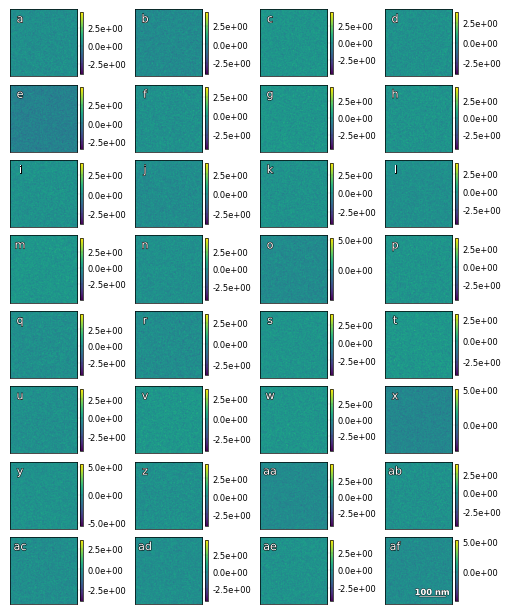

In [11]:
viz.channels = None
viz.scalebar_ = {"width": 250, "scale length": 100, "units": "nm"}
viz.model = model
viz.embeddings(
    mod=4,
    scalebar_=viz.scalebar_,
    name="vortex_VAE_1",
    shape_=vortex.data.shape,
    figsize=(5, 8),
)



In [24]:
viz.model = model
viz.channels = None
viz.scalebar_ = {"width": 291, "scale length": 100, "units": "nm"}
viz.multi_embeddings(
    h5_filename = f'{save_path}/{checkpoints_folder}/embeddings.h5',
    mod=4,
    scalebar_=viz.scalebar_,
    figsize=(5, 8),
    shape_=vortex.data.shape,
    output_folder='VAE_embeddings_by_beta'
)

100%|██████████| 28/28 [09:09<00:00, 19.63s/it]


In [12]:
# Builds a Movie
folder = f"{fig_path}/VAE_embeddings_by_beta/"
output_folder = "./movies_by_beta/"

# function to make the movie
make_movie('VAE_embeddings_by_beta',
           folder, "./movies/",
           'png', 3, text_list=True)

  0%|          | 0/28 [00:00<?, ?it/s]

  4%|▎         | 1/28 [00:00<00:06,  4.00it/s]

  7%|▋         | 2/28 [00:00<00:06,  3.97it/s]

 11%|█         | 3/28 [00:00<00:06,  3.99it/s]

 14%|█▍        | 4/28 [00:01<00:06,  4.00it/s]

 18%|█▊        | 5/28 [00:01<00:05,  4.00it/s]

 21%|██▏       | 6/28 [00:01<00:05,  4.01it/s]

 25%|██▌       | 7/28 [00:01<00:05,  4.01it/s]

 29%|██▊       | 8/28 [00:01<00:04,  4.01it/s]

 32%|███▏      | 9/28 [00:02<00:04,  4.03it/s]

 36%|███▌      | 10/28 [00:02<00:04,  4.03it/s]

 39%|███▉      | 11/28 [00:02<00:04,  4.03it/s]

 43%|████▎     | 12/28 [00:02<00:03,  4.01it/s]

 46%|████▋     | 13/28 [00:03<00:03,  4.00it/s]

 50%|█████     | 14/28 [00:03<00:03,  4.01it/s]

 54%|█████▎    | 15/28 [00:03<00:03,  4.02it/s]

 57%|█████▋    | 16/28 [00:03<00:02,  4.02it/s]

 61%|██████    | 17/28 [00:04<00:02,  3.90it/s]

 64%|██████▍   | 18/28 [00:04<00:02,  3.80it/s]

 68%|██████▊   | 19/28 [00:04<00:02,  3.86it/s]

 71%|███████▏  | 20/28 [00:05<00:02,  3.90it/s]

 75%|███████▌  | 21/28 [00:05<00:01,  3.89it/s]

 79%|███████▊  | 22/28 [00:05<00:01,  3.92it/s]

 82%|████████▏ | 23/28 [00:05<00:01,  3.93it/s]

 86%|████████▌ | 24/28 [00:06<00:01,  3.93it/s]

 89%|████████▉ | 25/28 [00:06<00:00,  3.96it/s]

 93%|█████████▎| 26/28 [00:06<00:00,  3.97it/s]

 96%|█████████▋| 27/28 [00:06<00:00,  3.86it/s]

100%|██████████| 28/28 [00:07<00:00,  3.89it/s]

100%|██████████| 28/28 [00:07<00:00,  3.95it/s]

In [30]:
viz.multi_generate_from_zero(input_folder = f'{save_path}/{checkpoints_folder}')

100%|██████████| 27/27 [00:23<00:00,  1.13it/s]


In [13]:
# Builds a Movie
folder = f"{fig_path}/generated0/"
output_folder = f"{fig_path}/movies/"

# function to make the movie
make_movie("Vortex Domains Generated from 0_1", folder, output_folder, "png", 3, 
           text_list=True)

  0%|          | 0/27 [00:00<?, ?it/s]

 11%|█         | 3/27 [00:00<00:01, 22.42it/s]

 22%|██▏       | 6/27 [00:00<00:00, 22.96it/s]

 33%|███▎      | 9/27 [00:00<00:00, 23.30it/s]

 44%|████▍     | 12/27 [00:00<00:00, 22.90it/s]

 56%|█████▌    | 15/27 [00:00<00:00, 23.05it/s]

 67%|██████▋   | 18/27 [00:00<00:00, 23.40it/s]

 78%|███████▊  | 21/27 [00:00<00:00, 22.94it/s]

 89%|████████▉ | 24/27 [00:01<00:00, 22.58it/s]

100%|██████████| 27/27 [00:01<00:00, 23.12it/s]

100%|██████████| 27/27 [00:01<00:00, 23.01it/s]

In [32]:
viz.model = model
viz.channels = list(np.arange(32))

# Make sure to load the correct checkpoint before generating images 
model.load_weights(
    f'{save_path}/{checkpoints_folder}/Weight_epoch:0027_l1coef:0.0000_lr:0.00003_trainloss:0.7317.pkl'
    )

viz.generator_images(
    folder_name='vortex_VAE_by_beta',
    figsize=(8,4),
    graph_layout=[32,8],
    cbar_number_format="%d",
    shape_=vortex.data.shape,
    divider_=False,
    generator_iters=100
)

100%|██████████| 100/100 [36:41<00:00, 22.01s/it]


In [14]:
# Builds a Movie
folder = f"{fig_path}/generator_images_vortex_VAE_by_beta/"
output_folder = f"{fig_path}/movies/"

# function to make the movie
make_movie("Vortex Domains Generator_1", folder, output_folder, "png", 3, text_list=True)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:17,  5.77it/s]

  2%|▏         | 2/100 [00:00<00:16,  5.86it/s]

  3%|▎         | 3/100 [00:00<00:16,  5.89it/s]

  4%|▍         | 4/100 [00:00<00:17,  5.54it/s]

  5%|▌         | 5/100 [00:00<00:18,  5.03it/s]

  6%|▌         | 6/100 [00:01<00:17,  5.28it/s]

  7%|▋         | 7/100 [00:01<00:16,  5.47it/s]

  8%|▊         | 8/100 [00:01<00:17,  5.24it/s]

  9%|▉         | 9/100 [00:01<00:17,  5.10it/s]

 10%|█         | 10/100 [00:01<00:16,  5.32it/s]

 11%|█         | 11/100 [00:02<00:16,  5.43it/s]

 12%|█▏        | 12/100 [00:02<00:15,  5.52it/s]

 13%|█▎        | 13/100 [00:02<00:15,  5.59it/s]

 14%|█▍        | 14/100 [00:02<00:15,  5.63it/s]

 15%|█▌        | 15/100 [00:02<00:15,  5.52it/s]

 16%|█▌        | 16/100 [00:02<00:15,  5.60it/s]

 17%|█▋        | 17/100 [00:03<00:14,  5.64it/s]

 18%|█▊        | 18/100 [00:03<00:14,  5.66it/s]

 19%|█▉        | 19/100 [00:03<00:14,  5.68it/s]

 20%|██        | 20/100 [00:03<00:14,  5.52it/s]

 21%|██        | 21/100 [00:03<00:14,  5.59it/s]

 22%|██▏       | 22/100 [00:03<00:13,  5.64it/s]

 23%|██▎       | 23/100 [00:04<00:13,  5.67it/s]

 24%|██▍       | 24/100 [00:04<00:13,  5.71it/s]

 25%|██▌       | 25/100 [00:04<00:13,  5.72it/s]

 26%|██▌       | 26/100 [00:04<00:12,  5.75it/s]

 27%|██▋       | 27/100 [00:04<00:12,  5.74it/s]

 28%|██▊       | 28/100 [00:05<00:12,  5.71it/s]

 29%|██▉       | 29/100 [00:05<00:12,  5.74it/s]

 30%|███       | 30/100 [00:05<00:12,  5.77it/s]

 31%|███       | 31/100 [00:05<00:12,  5.47it/s]

 32%|███▏      | 32/100 [00:05<00:12,  5.57it/s]

 33%|███▎      | 33/100 [00:05<00:11,  5.64it/s]

 34%|███▍      | 34/100 [00:06<00:11,  5.69it/s]

 35%|███▌      | 35/100 [00:06<00:11,  5.73it/s]

 36%|███▌      | 36/100 [00:06<00:11,  5.75it/s]

 37%|███▋      | 37/100 [00:06<00:10,  5.77it/s]

 38%|███▊      | 38/100 [00:06<00:10,  5.78it/s]

 39%|███▉      | 39/100 [00:06<00:10,  5.79it/s]

 40%|████      | 40/100 [00:07<00:10,  5.77it/s]

 41%|████      | 41/100 [00:07<00:10,  5.79it/s]

 42%|████▏     | 42/100 [00:07<00:09,  5.81it/s]

 43%|████▎     | 43/100 [00:07<00:09,  5.80it/s]

 44%|████▍     | 44/100 [00:07<00:09,  5.81it/s]

 45%|████▌     | 45/100 [00:07<00:09,  5.82it/s]

 46%|████▌     | 46/100 [00:08<00:09,  5.81it/s]

 47%|████▋     | 47/100 [00:08<00:09,  5.82it/s]

 48%|████▊     | 48/100 [00:08<00:08,  5.83it/s]

 49%|████▉     | 49/100 [00:08<00:08,  5.83it/s]

 50%|█████     | 50/100 [00:08<00:08,  5.85it/s]

 51%|█████     | 51/100 [00:09<00:08,  5.87it/s]

 52%|█████▏    | 52/100 [00:09<00:08,  5.50it/s]

 53%|█████▎    | 53/100 [00:09<00:08,  5.61it/s]

 54%|█████▍    | 54/100 [00:09<00:08,  5.70it/s]

 55%|█████▌    | 55/100 [00:09<00:08,  5.55it/s]

 56%|█████▌    | 56/100 [00:09<00:07,  5.62it/s]

 57%|█████▋    | 57/100 [00:10<00:07,  5.69it/s]

 58%|█████▊    | 58/100 [00:10<00:07,  5.72it/s]

 59%|█████▉    | 59/100 [00:10<00:07,  5.74it/s]

 60%|██████    | 60/100 [00:10<00:06,  5.78it/s]

 61%|██████    | 61/100 [00:10<00:06,  5.77it/s]

 62%|██████▏   | 62/100 [00:10<00:06,  5.78it/s]

 63%|██████▎   | 63/100 [00:11<00:06,  5.78it/s]

 64%|██████▍   | 64/100 [00:11<00:06,  5.81it/s]

 65%|██████▌   | 65/100 [00:11<00:06,  5.82it/s]

 66%|██████▌   | 66/100 [00:11<00:05,  5.82it/s]

 67%|██████▋   | 67/100 [00:11<00:05,  5.82it/s]

 68%|██████▊   | 68/100 [00:11<00:05,  5.80it/s]

 69%|██████▉   | 69/100 [00:12<00:05,  5.80it/s]

 70%|███████   | 70/100 [00:12<00:05,  5.80it/s]

 71%|███████   | 71/100 [00:12<00:05,  5.80it/s]

 72%|███████▏  | 72/100 [00:12<00:04,  5.81it/s]

 73%|███████▎  | 73/100 [00:12<00:04,  5.81it/s]

 74%|███████▍  | 74/100 [00:13<00:04,  5.81it/s]

 75%|███████▌  | 75/100 [00:13<00:04,  5.81it/s]

 76%|███████▌  | 76/100 [00:13<00:04,  5.81it/s]

 77%|███████▋  | 77/100 [00:13<00:03,  5.80it/s]

 78%|███████▊  | 78/100 [00:13<00:03,  5.80it/s]

 79%|███████▉  | 79/100 [00:13<00:03,  5.79it/s]

 80%|████████  | 80/100 [00:14<00:03,  5.78it/s]

 81%|████████  | 81/100 [00:14<00:03,  5.48it/s]

 82%|████████▏ | 82/100 [00:14<00:03,  5.36it/s]

 83%|████████▎ | 83/100 [00:14<00:03,  5.48it/s]

 84%|████████▍ | 84/100 [00:14<00:02,  5.57it/s]

 85%|████████▌ | 85/100 [00:14<00:02,  5.64it/s]

 86%|████████▌ | 86/100 [00:15<00:02,  5.68it/s]

 87%|████████▋ | 87/100 [00:15<00:02,  5.72it/s]

 88%|████████▊ | 88/100 [00:15<00:02,  5.75it/s]

 89%|████████▉ | 89/100 [00:15<00:01,  5.76it/s]

 90%|█████████ | 90/100 [00:15<00:01,  5.77it/s]

 91%|█████████ | 91/100 [00:16<00:01,  5.78it/s]

 92%|█████████▏| 92/100 [00:16<00:01,  5.78it/s]

 93%|█████████▎| 93/100 [00:16<00:01,  5.78it/s]

 94%|█████████▍| 94/100 [00:16<00:01,  5.78it/s]

 95%|█████████▌| 95/100 [00:16<00:00,  5.78it/s]

 96%|█████████▌| 96/100 [00:16<00:00,  5.77it/s]

 97%|█████████▋| 97/100 [00:17<00:00,  5.77it/s]

 98%|█████████▊| 98/100 [00:17<00:00,  5.77it/s]

 99%|█████████▉| 99/100 [00:17<00:00,  5.77it/s]

100%|██████████| 100/100 [00:17<00:00,  5.76it/s]

100%|██████████| 100/100 [00:17<00:00,  5.69it/s]